# Amazon Reviews Analysis
---
<b>By David Penny<b>

### 1. Data Ingest, Check and Cleanup

 
---

In [1]:
# Let's start by importing our (very) favorite libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textstat

In [2]:
# Read in the data
df = pd.read_csv('data/labeled_amazon_reviews.txt', sep="\t")
# Rename columns for ease of use
df.columns = ["doc_id", "falsified", "rating", "verified_purchase", "product_category", "product_id", "product_title","review_title","review_text"]

In [3]:
# Let's take a peek at the data
# '__label1__' indicates a falsified review
# '__label2__' indicates a honest review
df.head(3)

doc_id   falsified  rating verified_purchase product_category  product_id  \
0       1  __label1__       4                 N               PC  B00008NG7N   
1       2  __label1__       4                 Y         Wireless  B00LH0Y3NM   
2       3  __label1__       3                 N             Baby  B000I5UZ1Q   

                                       product_title  \
0        Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement ...   
2       Fisher-Price Papasan Cradle Swing, Starlight   

               review_title                                        review_text  
0                    useful  When least you think so, this product will sav...  
1     New era for batteries  Lithium batteries are something new introduced...  
2  doesn't swing very well.  I purchased this swing for my baby. She is 6 m...

In [4]:
# Let's explore a few of the full length reviews to understand their content.
# pd.set_option('display.max_colwidth', None)
# Looks good! Let's reset the setting
pd.set_option('display.max_colwidth', 70)
# display(df['review_text'][0:2])

In [5]:
# How big is our dataset?
df.shape

(21000, 9)

In [6]:
# What are the data types of our variables?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   doc_id             21000 non-null  int64 
 1   falsified          21000 non-null  object
 2   rating             21000 non-null  int64 
 3   verified_purchase  21000 non-null  object
 4   product_category   21000 non-null  object
 5   product_id         21000 non-null  object
 6   product_title      21000 non-null  object
 7   review_title       21000 non-null  object
 8   review_text        21000 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [7]:
# We may preform a few checks later on, so lets make a function.
def display_NA_counts(the_df):
    null_series = the_df.isna().sum(axis=0)
    display(null_series[null_series > 0])

In [8]:
# Check for NA's
display_NA_counts(df)

Series([], dtype: int64)

In [9]:
#Check for duplicated rows
df.duplicated().sum()*100.0/df.shape[0]

0.0

<b> Data Augmenting <b>

Now begins some essential cleanup and data augmentation. We'll convert some variables into more meaningful indicators as well as make it more friendly for computer analysis.

In [10]:
# Lets convert our verified_purchase column to binary values.
def get_verified_value(value):
    if value == 'Y':
        return 1
    else:
        return 0

In [11]:
df['verified_purchase'] = df['verified_purchase'].apply(get_verified_value)

In [12]:
df.head(2)

doc_id   falsified  rating  verified_purchase product_category  product_id  \
0       1  __label1__       4                  0               PC  B00008NG7N   
1       2  __label1__       4                  1         Wireless  B00LH0Y3NM   

                                                           product_title  \
0                            Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Batte...   

            review_title  \
0                 useful   
1  New era for batteries   

                                                             review_text  
0  When least you think so, this product will save the day. Just keep...  
1  Lithium batteries are something new introduced in the market there...

In [13]:
# Lets convert our falsified column to binary values.
def get_label(value):
    if value == '__label1__':
        return 1
    else:
        return 0

In [14]:
df['falsified'] = df['falsified'].apply(get_label)

In [15]:
df.head(2)

doc_id  falsified  rating  verified_purchase product_category  product_id  \
0       1          1       4                  0               PC  B00008NG7N   
1       2          1       4                  1         Wireless  B00LH0Y3NM   

                                                           product_title  \
0                            Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Batte...   

            review_title  \
0                 useful   
1  New era for batteries   

                                                             review_text  
0  When least you think so, this product will save the day. Just keep...  
1  Lithium batteries are something new introduced in the market there...

In [16]:
# Lets convert our rating column to binary values.
# We'll consider ratings higher than (and incl.) 4 to represent a positive sentiment.
def get_sentiment(value):
    if value > 3:
        return 1
    else:
        return 0

In [17]:
df['sentiment'] = df['rating'].apply(get_sentiment)

In [18]:
df.head()

doc_id  falsified  rating  verified_purchase product_category  product_id  \
0       1          1       4                  0               PC  B00008NG7N   
1       2          1       4                  1         Wireless  B00LH0Y3NM   
2       3          1       3                  0             Baby  B000I5UZ1Q   
3       4          1       4                  0  Office Products  B003822IRA   
4       5          1       4                  0           Beauty  B00PWSAXAM   

                                                           product_title  \
0                            Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Batte...   
2                           Fisher-Price Papasan Cradle Swing, Starlight   
3                      Casio MS-80B Standard Function Desktop Calculator   
4  Shine Whitening - Zero Peroxide Teeth Whitening System - No Sensit...   

               review_title  \
0                    useful   
1     New era for batteries   
2  doesn't swing very well.   
3          Great computing!   
4     Only use twice a week   

                                                             review_text  \
0  When least you think so, this product will save the day. Just keep...   
1  Lithium batteries are something new introduced in the market there...   
2  I purchased this swing for my baby. She is 6 months now and has pr...   
3  I was looking for an inexpensive desk calcolatur and here it is. I...   
4  I only use it twice a week and the results are great. I have used ...   

   sentiment  
0          1  
1          1  
2          0  
3          1  
4          1

<b> 3-Star Ratings <b>

Lets toggle this to see what happens if we remove values that don't help us in determining the sentiment. Since '3' is very middle of the road, we can see what happens to our data if we remove it.

In [19]:
# # Let's remove those who are on the fence with their review
# # Removing ratings with rating = 3 ("On the fence")
# df = df.loc[:, ['review_body', 'star_rating']]
# df = df.query('star_rating != 3.0')
# df.head()

### 2. Preliminary EDA
---

5    12210
4     3973
3     1868
1     1757
2     1192
Name: rating, dtype: int64


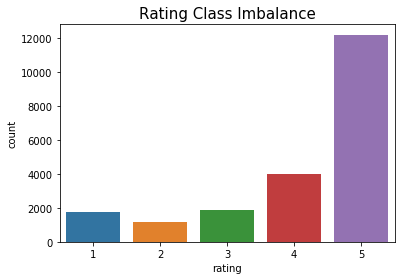

In [20]:
# What is the distribution of our ratings column?

sns.countplot(x='rating', data=df)
plt.title('Rating Class Imbalance', size=15)
print(df['rating'].value_counts())

Seems like we have a significant class imbalance within this sample of data.

1    16183
0     4817
Name: sentiment, dtype: int64


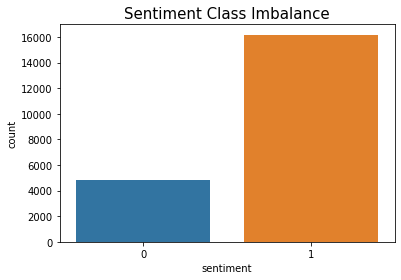

In [21]:
# What is the distribution of our sentiment column?

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Class Imbalance', size=15)
print(df['sentiment'].value_counts())

Based on our sentument calculation, we now have quite a large class imbalance. We'll need to fix this later!

1    10500
0    10500
Name: falsified, dtype: int64


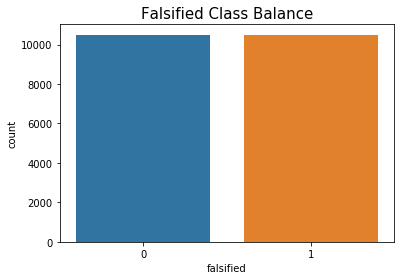

In [22]:
# What is the distribution of our falsified column?

sns.countplot(x='falsified', data=df)
plt.title('Falsified Class Balance', size=15)
print(df['falsified'].value_counts())

Text(0.5, 1.0, 'Product Category: Balanced')

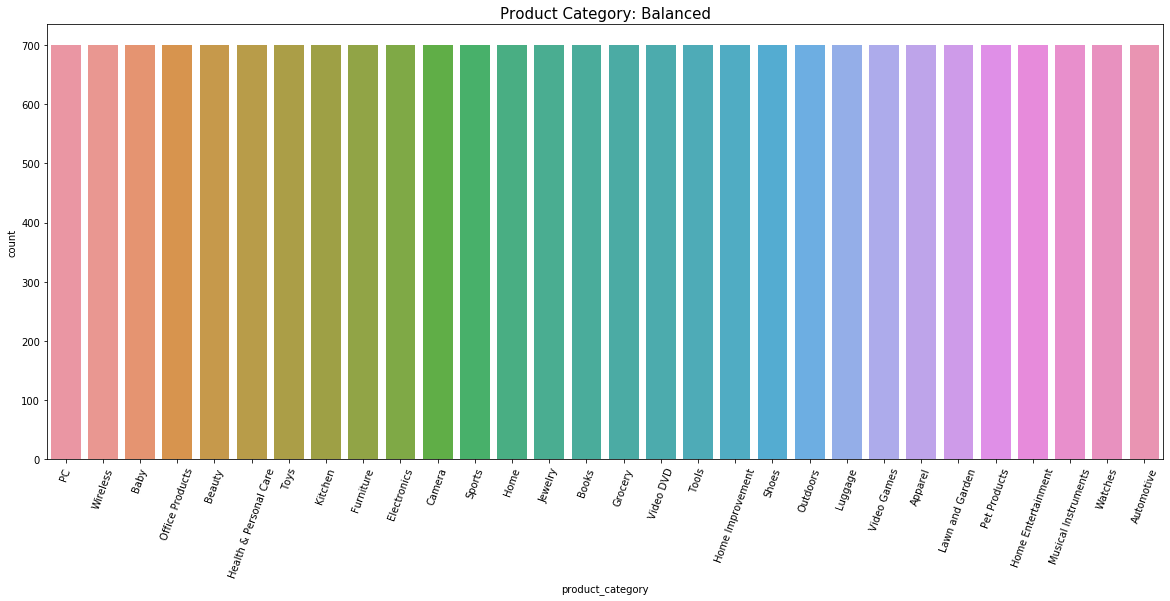

In [40]:
# Let's check the representation across 'product_category'.
plt.figure(figsize=(20, 8))
plt.xticks(rotation=70)
sns.countplot(x='product_category', data=df)
plt.title('Product Category: Balanced', size=15)

It seems this dataset has equal representation across all the major product categories. This is slightly suspicious. I wonder if this dataset has been 'cooked up' for this purpose. One way to tell would be to look at the scores at the end of the modeling. If the scores are close to 50%, I will be highly skeptical of this dataset.

<b>WordCloud<b>

Another check we can preform is a wordcloud. This is helpful not only to see what are some of the most frequent words in the review_text column but we can also see if any html has remained from previous scraping.

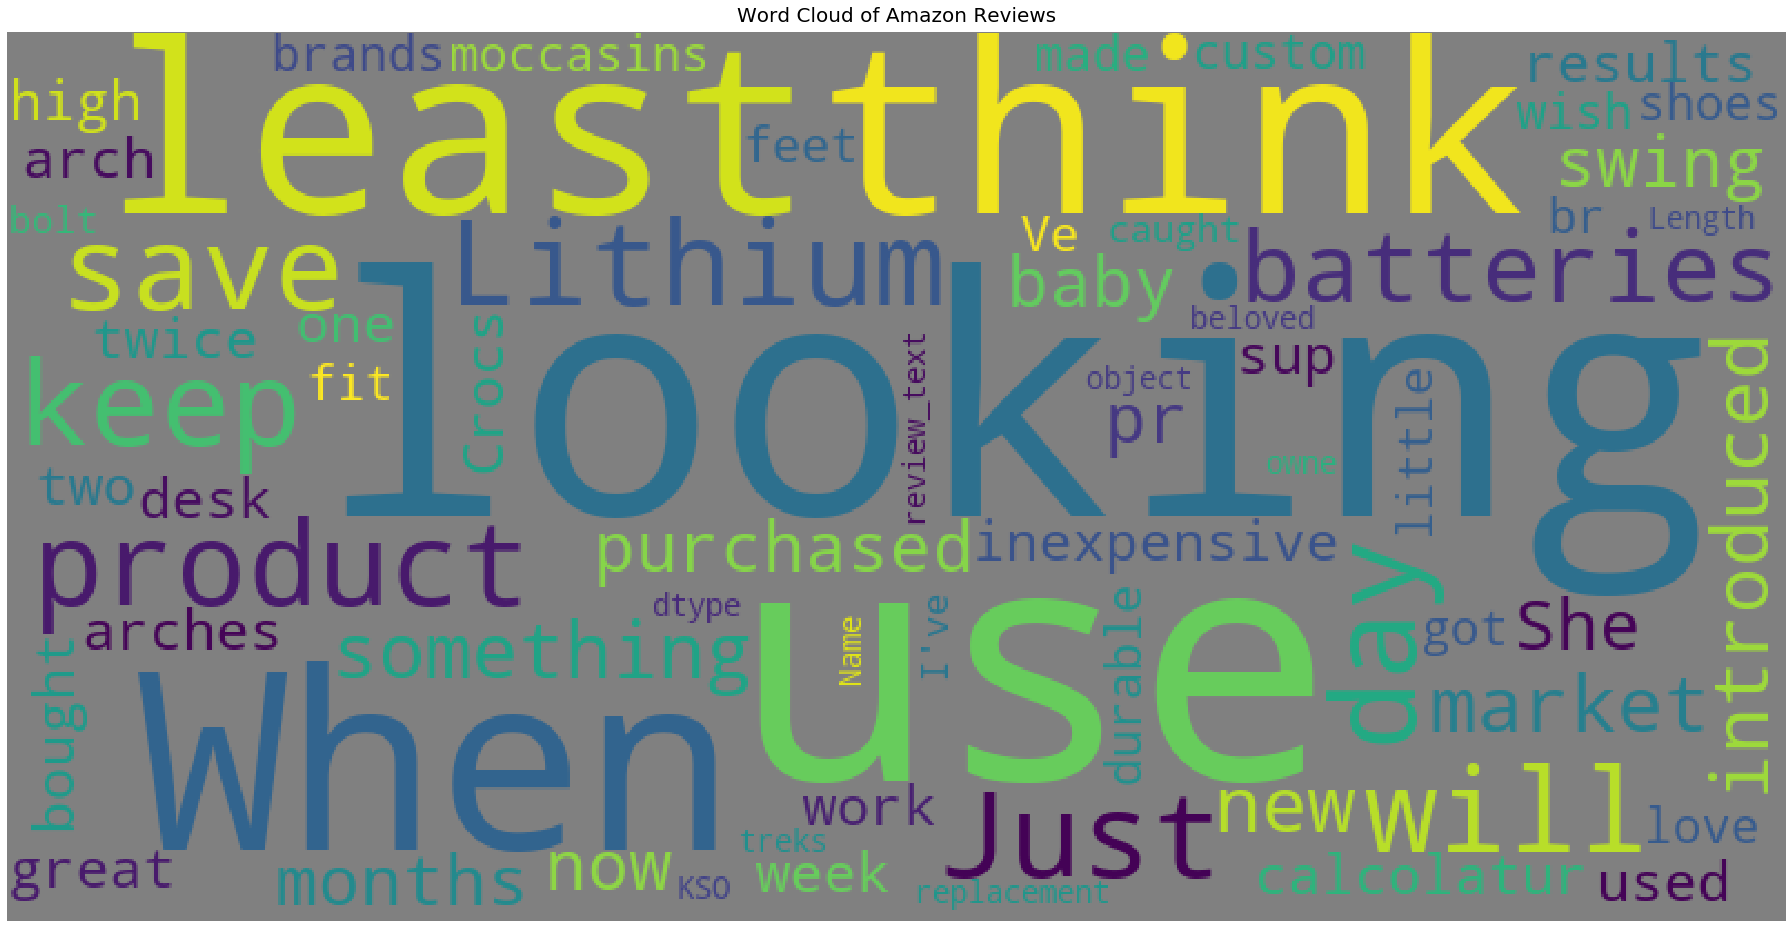

In [51]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=150, figure_size=(25.0,25.0), 
                   title = None, title_size=20, image_color=False):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(background_color='gray',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 50,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df['review_text'], title="Word Cloud of Amazon Reviews")

In [52]:
# Let's clean out any html (should it exist)
import bs4
df['review_text'] = df['review_text'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text())

### 3. Feature Extraction
---

Here we will begin to expand our review_text column into a few more features used later in analysis. We will be primarily be preforming basic math calculations but will utilize the textstat library along with Stanford CoreNLP package to perform some heavy lifting.

In [53]:
import string

# Number of words in the text
df["num_words_in_text"] = df["review_text"].apply(lambda x: len(str(x).split()))

# Number of stopwords in the text
df["num_stopwords"] = df["review_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# Number of words in the text (not counting stopwords)
df["num_words_in_text_no_stop"] = df.apply(lambda x: x['num_words_in_text'] - x['num_stopwords'], axis=1)

# Number of unique words in the text
df["num_unique_words"] = df["review_text"].apply(lambda x: len(set(str(x).split())))

# Average length of the words in the text
df["mean_word_len"] = df["review_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Max length of the words in the text
df["max_word_len"] = df["review_text"].apply(lambda x: np.max([len(w) for w in str(x).split()]))

# Number of characters in the text
df["num_chars"] = df["review_text"].apply(lambda x: len(str(x)))

# Number of punctuations in the text
df["num_punctuations"] = df['review_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [54]:
# Number of Scentences
df["num_scentences_in_text"] = df["review_text"].apply(lambda x: textstat.sentence_count(x))

# Flesch Reading Ease Formula
df["flesch_ease"] = df["review_text"].apply(lambda x: textstat.flesch_reading_ease(x))

# Flesh-Kincaid Grade Level
df["flesch_kincaid_grade"] = df["review_text"].apply(lambda x: textstat.flesch_kincaid_grade(x))

# Automated Readability Index
df["automated_readability_index"] = df["review_text"].apply(lambda x: textstat.automated_readability_index(x))

# Overall Readability Index
df["overall_readability_index"] = df["review_text"].apply(lambda x: textstat.text_standard(x, float_output=True))

In [55]:
# Sanity Check, let's see if everything looks as it should.
df.head(1)

doc_id  falsified  rating  verified_purchase product_category  product_id  \
0       1          1       4                  0               PC  B00008NG7N   

                                 product_title review_title  \
0  Targus PAUK10U Ultra Mini USB Keypad, Black       useful   

                                                             review_text  \
0  When least you think so, this product will save the day. Just keep...   

   sentiment  ...  num_unique_words  mean_word_len  max_word_len  num_chars  \
0          1  ...                21       4.086957            10        116   

   num_punctuations  num_scentences_in_text  flesch_ease  \
0                 3                       2        102.1   

   flesch_kincaid_grade  automated_readability_index  \
0                   1.9                          3.6   

   overall_readability_index  
0                        5.0  

[1 rows x 23 columns]

In [97]:
#Let's see how our data looks and if there are any extremes in our data.
df.describe().transpose()

count     mean     std     min     25%  \
doc_id                      20541.00 10497.29 6082.22    1.00 5209.00   
falsified                   20541.00     0.50    0.50    0.00    0.00   
rating                      20541.00     4.13    1.28    1.00    4.00   
verified_purchase           20541.00     0.56    0.50    0.00    0.00   
sentiment                   20541.00     0.77    0.42    0.00    1.00   
num_words_in_text           20541.00    61.38   53.40   10.00   29.00   
num_stopwords               20541.00    30.68   26.93    0.00   14.00   
num_words_in_text_no_stop   20541.00    30.70   27.15    6.00   15.00   
num_unique_words            20541.00    47.56   32.81    6.00   26.00   
mean_word_len               20541.00     4.33    0.42    3.09    4.05   
max_word_len                20541.00    11.19    2.65    6.00    9.00   
num_chars                   20541.00   327.03  290.32   73.00  154.00   
num_punctuations            20541.00     9.04    9.09    0.00    4.00   
num_scentences_in_text      20541.00     3.20    2.51    1.00    1.00   
flesch_ease                 20541.00    67.84   34.14 -312.54   61.80   
flesch_kincaid_grade        20541.00    10.31   12.26   -1.60    4.50   
automated_readability_index 20541.00    12.16   15.54   -2.10    4.90   
overall_readability_index   20541.00     8.79    8.46   -1.00    6.00   

                                 50%      75%      max  
doc_id                      10445.00 15783.00 21000.00  
falsified                       1.00     1.00     1.00  
rating                          5.00     5.00     5.00  
verified_purchase               1.00     1.00     1.00  
sentiment                       1.00     1.00     1.00  
num_words_in_text              44.00    70.00   400.00  
num_stopwords                  22.00    36.00   215.00  
num_words_in_text_no_stop      22.00    35.00   231.00  
num_unique_words               37.00    56.00   250.00  
mean_word_len                   4.29     4.57     8.08  
max_word_len                   11.00    12.00    25.00  
num_chars                     231.00   371.00  2352.00  
num_punctuations                6.00    10.00    99.00  
num_scentences_in_text          3.00     4.00    36.00  
flesch_ease                    76.05    85.69   116.35  
flesch_kincaid_grade            6.80    11.10   155.00  
automated_readability_index     7.70    12.90   196.70  
overall_readability_index       7.00     9.00   152.00

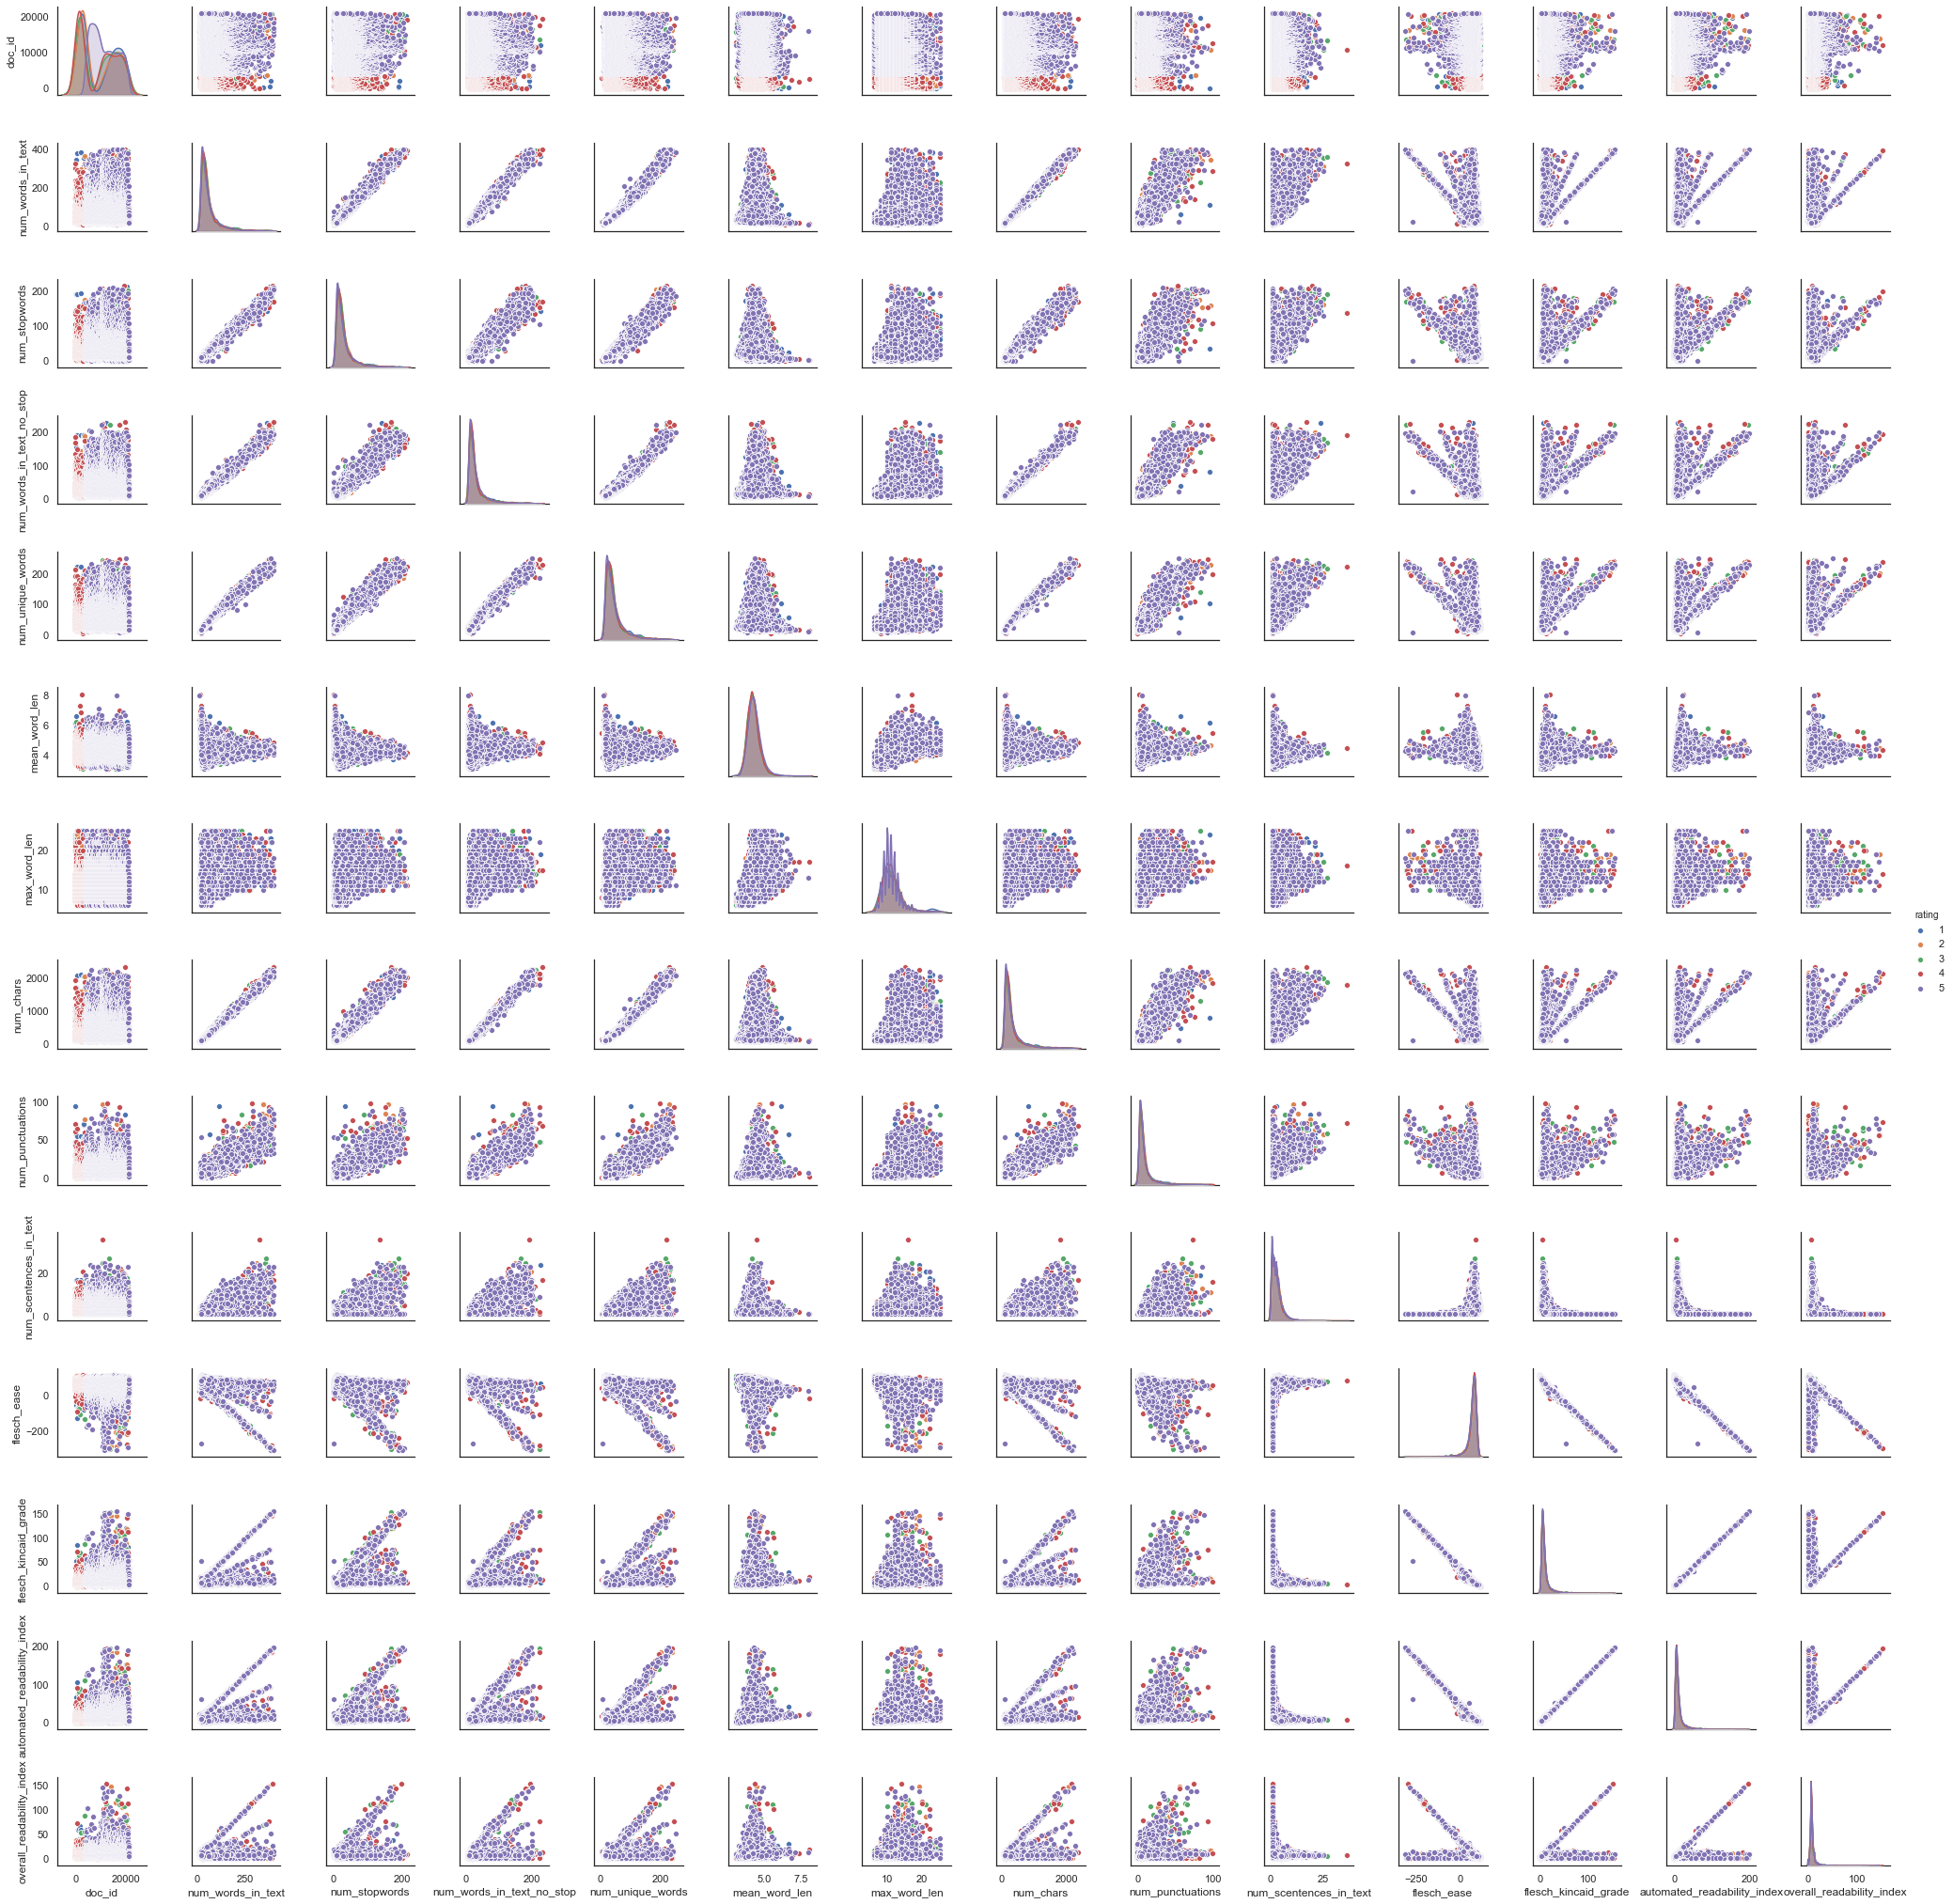

In [93]:
#Let's see how our data looks VISUALLY and if there are any extremes in our data.
df_for_pair_plot1 = df.drop(columns=['verified_purchase', 'falsified', 'sentiment'])
sns.pairplot(df_for_pair_plot1, height=2, kind="scatter", hue='rating');

/Users/davepenny/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


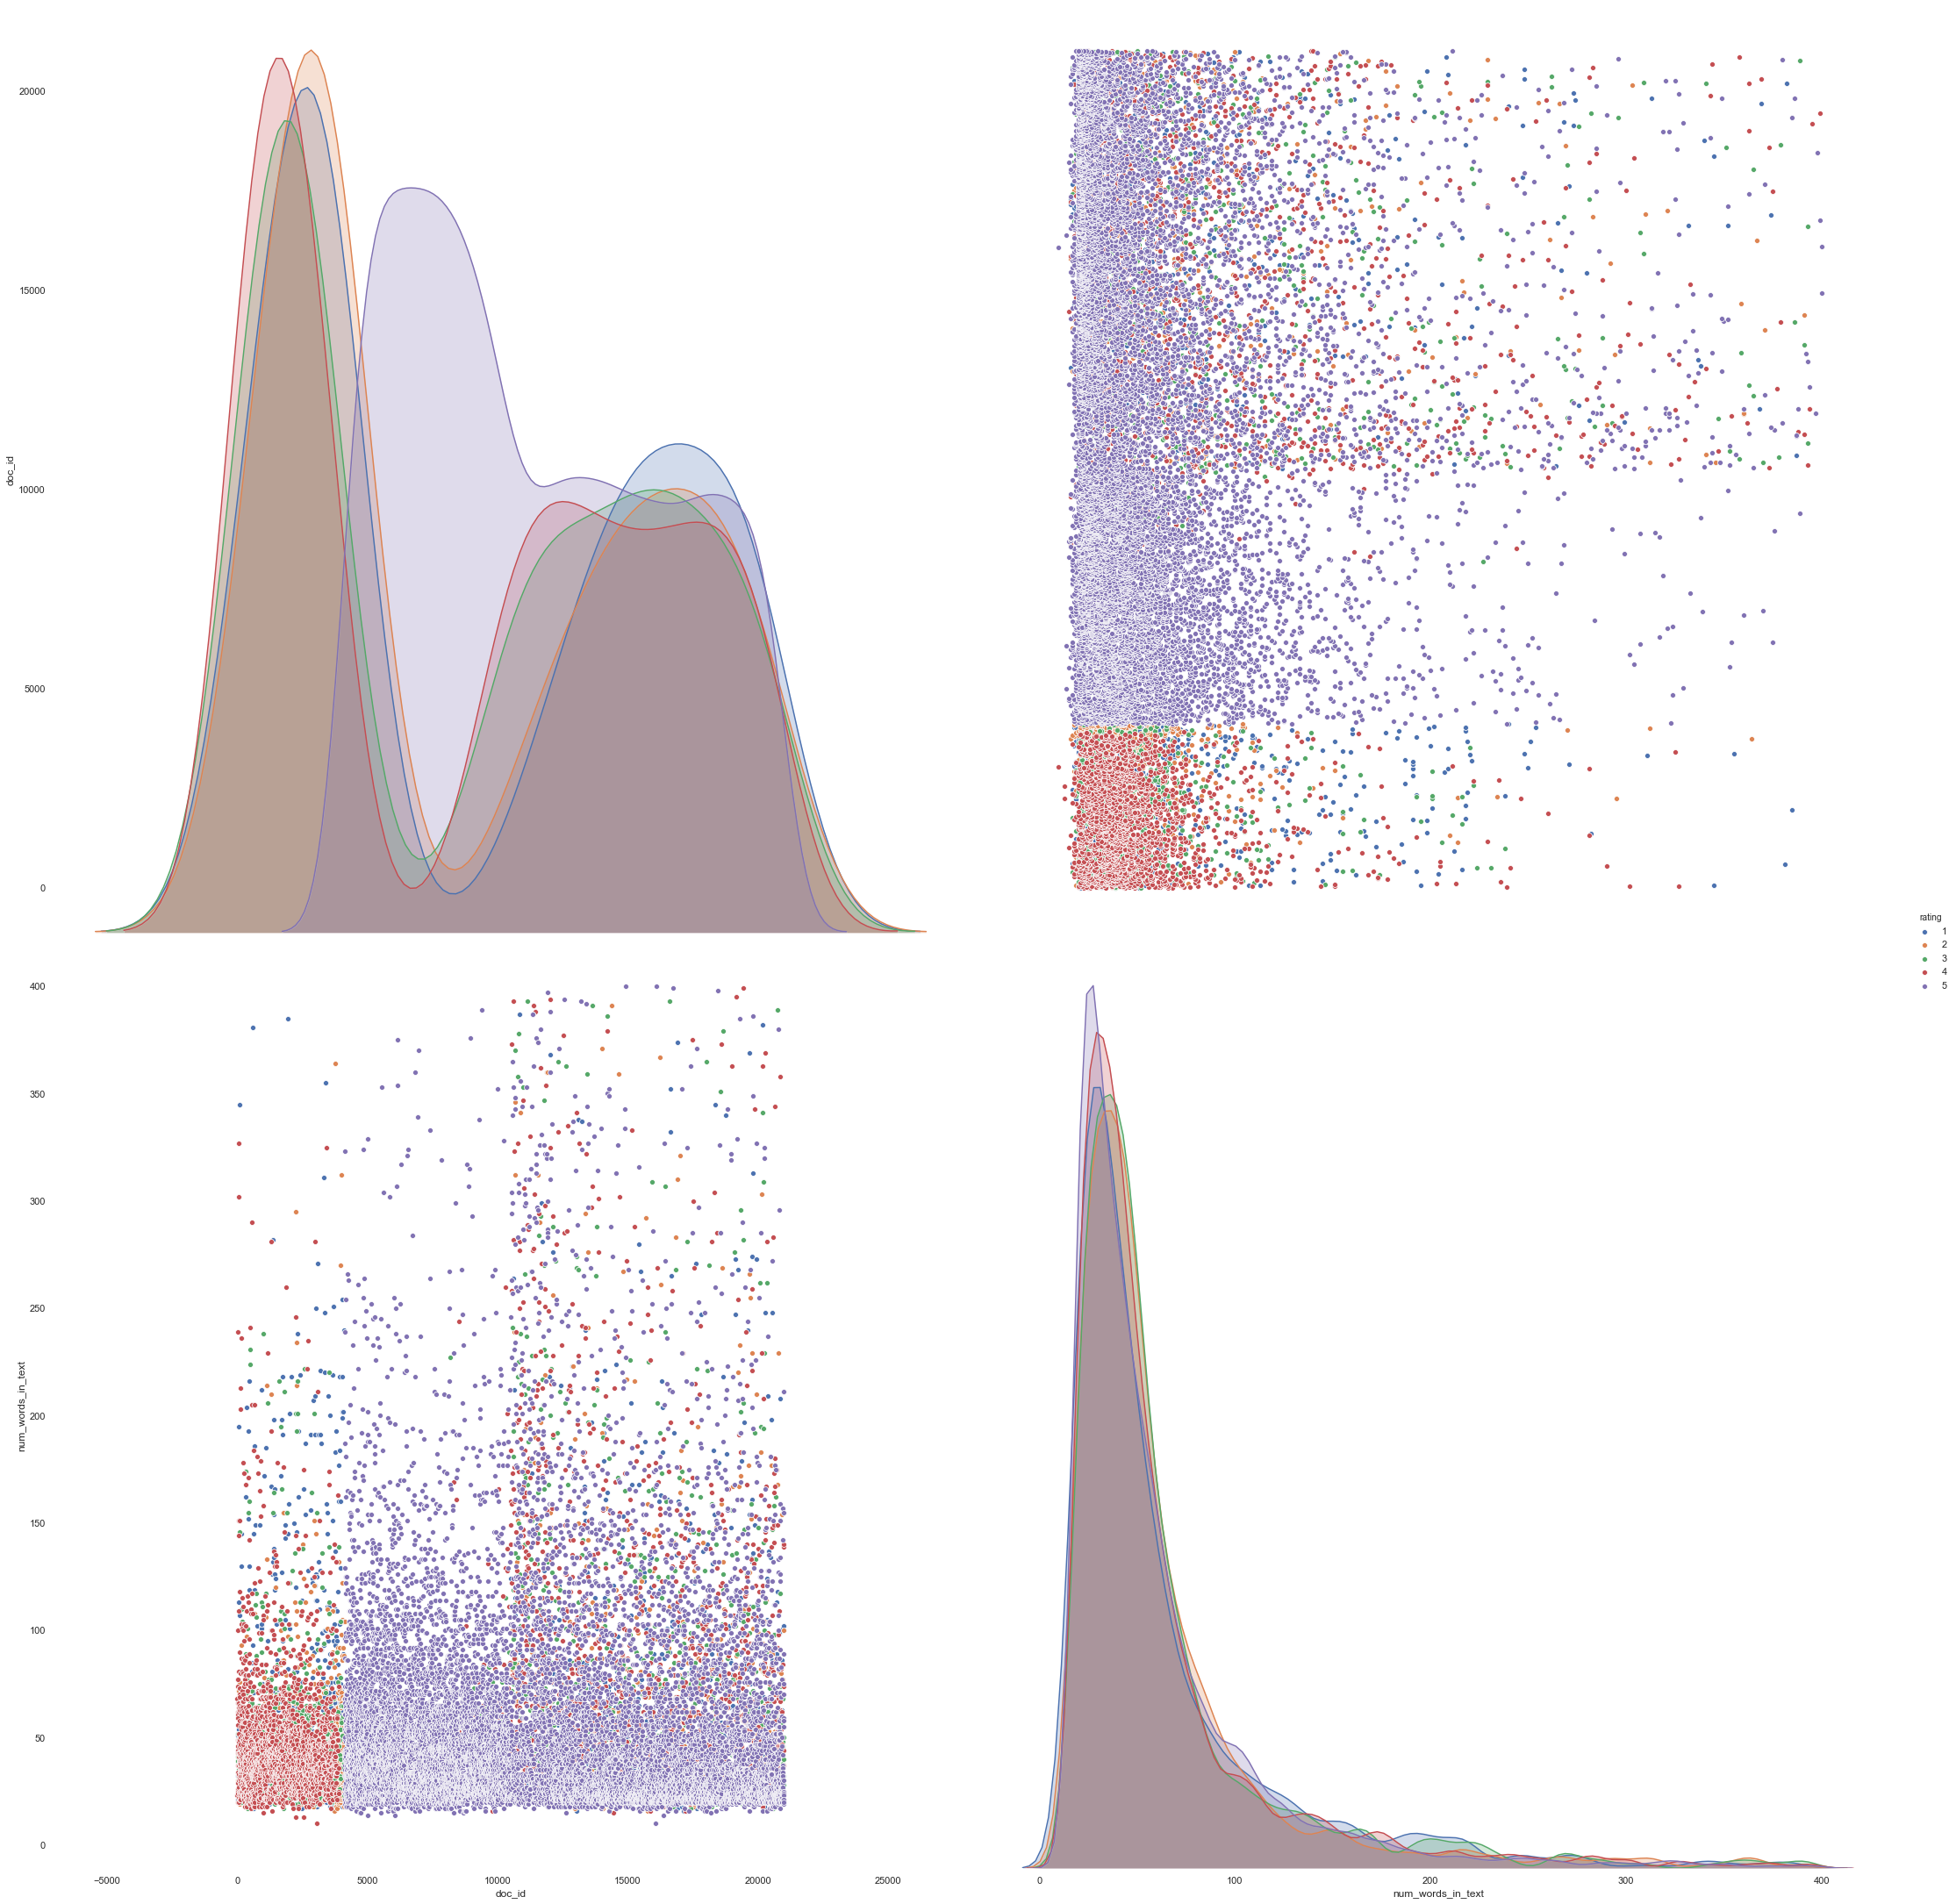

In [123]:
# Let's take another look at the distribution of the reviews and their ratings. Superimposed ontop of eachother, we can see some interesting trends.
df_for_pair_plot2 = df[['doc_id', 'num_words_in_text', 'rating']]
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
ax = sns.pairplot(df_for_pair_plot2, height=2, kind="scatter", hue='rating', size=15);

<b>More Cleanup<b>

We can see that we have some extremly large reviews, let's truncate some of the reviews.

In [57]:
# Truncate some extreme values

# 400 words is about 4 paragraphs. By 4 Paragraphs we should have the idea across.
df = df.query('num_words_in_text <= 400 and num_punctuations < 100')

In [58]:
# Truncate some extreme values

# Why do we have words longer than 25 characters? Are some hmtl links or other formatting issues still present?
df.query('max_word_len > 25')

doc_id  falsified  rating  verified_purchase        product_category  \
13         14          1       4                  0  Health & Personal Care   
64         65          1       1                  0                      PC   
103       104          1       4                  0             Electronics   
149       150          1       1                  0  Health & Personal Care   
172       173          1       4                  0  Health & Personal Care   
...       ...        ...     ...                ...                     ...   
19794   19795          0       2                  1                    Baby   
19899   19900          0       5                  1                Outdoors   
20378   20379          0       4                  1                Wireless   
20471   20472          0       1                  0                   Books   
20667   20668          0       5                  1                 Jewelry   

       product_id  \
13     B000TD0PXU   
64     B00PJH5RNY   
103    B0077V8930   
149    B001QW9B5Q   
172    B00005KGUB   
...           ...   
19794  B006V84M1I   
19899  B004TDC1QA   
20378  B008RZJHJU   
20471  1594034648   
20667  B001DCFRAM   

                                                               product_title  \
13          Now Foods Mood Support With St Johns Wort Veg-capsules, 90-Count   
64     Singo 85W AC Power Supply Chargers & Adapter for Macbook Pro 15 or...   
103    Onkyo TX-SR313 5.1- Channel Home Theater A/V Receiver (Discontinue...   
149                    Herbalife Formula 1 Shake Mix - French Vanilla (750g)   
172                         Cosamin DS Joint Health Supplement, 108 Capsules   
...                                                                      ...   
19794  Munchkin Click Lock Trainer Cup, Green/Orange, 2 Count, 7 Ounce (D...   
19899                           Smith Optics Holt Helmet, Large, Matte Black   
20378  Baofeng USB Programming Cable for Baofeng Two way Radio UV-5R, BF-...   
20471  How Barack Obama is Bankrupting the U.S. Economy (Encounter Broads...   
20667                  jc-a20-37-9 925 Sterling Silver 3mm Wide Wedding Band   

                                             review_title  \
13                                                Just OK   
64                                           SMOCKING HOT   
103                                    good for the price   
149      DOES NOT WORK, PLEASE DON'T WASTE YOUR MONEY!!!!   
172                                     Helps Soothe Pain   
...                                                   ...   
19794                            THESE SIPPY CUPS LEAK!!!   
19899                                           gnar gnar   
20378  It does what it is supposed to do... tips included   
20471                   Well this was the guy's last book   
20667                              Beautiful silver ring.   

                                                                 review_text  \
13     Only giving this 3 stars because it is so cheap. Has a very mild s...   
64     This is a SMOKING HOT deal. This is the second unit in the last 2-...   
103    For the price, this is a pretty good receiver, but if you are want...   
149    I purchased Herbalife a few months ago at my local health retailer...   
172    Overall I have more of the following since using the cosaminDS cap...   
...                                                                      ...   
19794  I really like the design of this sippy cup but it LEAKS! Yesterday...   
19899  my first helmet and its a great one.. it keeps my ears and head wa...   
20378  I have the Baofeng UV-B6.  Downloaded the programming software fro...   
20471  http://www.amazon.com/Bullish-Bush-Owenership-Society-Stronger/dp/...   
20667  My ring came in very quickly and the size was perfect for the fing...   

       sentiment  ...  num_unique_words  mean_word_len  max_word_len  \
13             1  ...                63       5.637681            28   
64    

In [59]:
# Truncate extreme words and un-clean reviews

# Looks like some HMTL links and other unecessary items made it in, lets cut it off at 25 chars seeing as a word like "uvulopalatopharyngoplasty" is 25 chars and we shouldn't need words like this in there.
df = df.query('max_word_len <= 25')

In [60]:
#Sanity check. Let's make sure we've made a difference.
df.describe().transpose()
# Looks like making that cutoff didn't take too many reviews away from us.

count          mean          std         min  \
doc_id                       20541.0  10497.287474  6082.217802    1.000000   
falsified                    20541.0      0.502556     0.500006    0.000000   
rating                       20541.0      4.128134     1.278326    1.000000   
verified_purchase            20541.0      0.562923     0.496037    0.000000   
sentiment                    20541.0      0.770410     0.420579    0.000000   
num_words_in_text            20541.0     61.384694    53.395383   10.000000   
num_stopwords                20541.0     30.684631    26.933977    0.000000   
num_words_in_text_no_stop    20541.0     30.700063    27.148577    6.000000   
num_unique_words             20541.0     47.558736    32.808932    6.000000   
mean_word_len                20541.0      4.334818     0.423277    3.088235   
max_word_len                 20541.0     11.190594     2.646550    6.000000   
num_chars                    20541.0    327.031936   290.323330   73.000000   
num_punctuations             20541.0      9.035587     9.089555    0.000000   
num_scentences_in_text       20541.0      3.198627     2.514201    1.000000   
flesch_ease                  20541.0     67.836657    34.135508 -312.540000   
flesch_kincaid_grade         20541.0     10.311153    12.264228   -1.600000   
automated_readability_index  20541.0     12.160752    15.539709   -2.100000   
overall_readability_index    20541.0      8.793048     8.461458   -1.000000   

                                     25%           50%           75%  \
doc_id                       5209.000000  10445.000000  15783.000000   
falsified                       0.000000      1.000000      1.000000   
rating                          4.000000      5.000000      5.000000   
verified_purchase               0.000000      1.000000      1.000000   
sentiment                       1.000000      1.000000      1.000000   
num_words_in_text              29.000000     44.000000     70.000000   
num_stopwords                  14.000000     22.000000     36.000000   
num_words_in_text_no_stop      15.000000     22.000000     35.000000   
num_unique_words               26.000000     37.000000     56.000000   
mean_word_len                   4.054054      4.292683      4.565934   
max_word_len                    9.000000     11.000000     12.000000   
num_chars                     154.000000    231.000000    371.000000   
num_punctuations                4.000000      6.000000     10.000000   
num_scentences_in_text          1.000000      3.000000      4.000000   
flesch_ease                    61.800000     76.050000     85.690000   
flesch_kincaid_grade            4.500000      6.800000     11.100000   
automated_readability_index     4.900000      7.700000     12.900000   
overall_readability_index       6.000000      7.000000      9.000000   

                                      max  
doc_id                       21000.000000  
falsified                        1.000000  
rating                           5.000000  
verified_purchase                1.000000  
sentiment                        1.000000  
num_words_in_text              400.000000  
num_stopwords                  215.000000  
num_words_in_text_no_stop      231.000000  
num_unique_words               250.000000  
mean_word_len                    8.076923  
max_word_len                    25.000000  
num_chars                     2352.000000  
num_punctuations                99.000000  
num_scentences_in_text          36.000000  
flesch_ease                    116.350000  
flesch_kincaid_grade           155.000000  
automated_readability_index    196.700000  
overall_readability_index      152.000000

<b>Total Sentence Sentiment and Stanford NLP<b>

---

Next up, we'll be utilizing Stanford CoreNLP to preform per sentence sentiment calculation and then calculate the weighted sum of the sentiment. The system is 87.6% accurate at predicting the sentiment of a scentence.

Total sentiment is important as it captures weather or not the review contains a mixed sentiment or if the review is overly negative (or overly positive). Since every scentence in each review is given a sentiment score, the total sentiment is calculated as a weighted sum. 

$$Total Sentiment = 1∗(𝑉𝑒𝑟𝑦 𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒) + 2 ∗ (𝑁𝑒𝑔𝑎𝑡𝑖𝑣𝑒) + 3 ∗ (𝑁𝑒𝑢𝑡𝑟𝑎𝑙) + 4 ∗ (𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒) + 5 ∗ (𝑉𝑒𝑟𝑦 𝑃𝑜𝑠𝑖𝑡𝑖𝑣𝑒)$$

<b>Installation Process<b>
- Install StanfordNLP via [This Link](https://stanfordnlp.github.io/CoreNLP/)
- Open Terminal and cd into the directory folder using: "cd stanford-corenlp-full-2018-10-05"
- Start the CoreNLP server using: "java -mx6g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -timeout 5000" in the same terminal
- Take note of the last 4 digits on the line "StanfordCoreNLPServer listening at ..... 9000" <--<
- Use the following code to access the server, swapping out the 9000 for another number if your machine directs you to do so

    nlp = StanfordCoreNLP('http://localhost:9000')
    
[Click Here for more information](https://towardsdatascience.com/natural-language-processing-using-stanfords-corenlp-d9e64c1e1024)

<mark>If you don't have this package installed, please skip to the section "Grouping and Cleaning" and simply combine the datasets df1, df2, df3, df4 (seen below).<mark>

In [ ]:
from pycorenlp import StanfordCoreNLP

i = 0

In [ ]:
def total_sentiment(text):
    global i
    
    # Initialize our counting system
    n1=0
    n2=0
    n3=0
    n4=0
    n5=0
    
    # Connect to the local server
    nlp = StanfordCoreNLP('http://localhost:9000')

    # We only need the annotators: sentiment, ner, pos and JSON is a acceptable output
    results = nlp.annotate(text,properties={
            'annotators':'sentiment, ner, pos',
            'outputFormat': 'json',
            'timeout': 50000,
            })

    for s in results["sentences"]:
        if(s["sentiment"] == 'Very Negative'):
            n1+=1
        elif(s["sentiment"] == 'Negative'):
            n2+=1
        elif(s["sentiment"] == 'Neutral'):
            n3+=1
        elif(s["sentiment"] == 'Positive'):
            n4+=1
        else:
            n5+=1

        total_sentiment = 1*n1 + 2*n2 + 3*n3 + 4*n4 + 5*n5

#         print(s["sentiment"])

    i = i +1
    print(f'Finished the {i} total_sentiment with value {total_sentiment}...', end='\r')
    
    return(total_sentiment)



In [ ]:
# If Standord CoreNLP runs into a problem for a particular row, keep going with the next row
# We don't want the program to exit, instead, leave it empty and we can address or drop it later
def get_sentence_catch(x):
    try:
        return(total_sentiment(x))
    except: 
        pass

In [ ]:
# Let's split our dataframe up into smaller chunks to prevent CoreNLP from running out of memory
# In the initialization of the CoreNLP server, allocating 8Gb of ram only allowed for calculating 11k of the 21k reviews.
# Chunking the data will safeguard from this issue.
df1 = df_final[['doc_id', 'review_text']][:5000]
df2 = df_final[['doc_id', 'review_text']][5001:10000]
df3 = df_final[['doc_id', 'review_text']][10001:15000]
df4 = df_final[['doc_id', 'review_text']][15001:20862]

<b>Performing the operation:<b>
    
Here's where we perform the operations. 
    
For each row, we first we call the get_scentence_catch function, which then calls the total_sentiment function. This process ensures that CoreNLP continues to run through all 5000 reviews before exiting if it encounters an error. Some reviews contain information that CoreNLP stuggles to process.
    
Each 5000 review chunk takes about 1 hour on my machine. To safeguard against unknown issues, each time we finish one chunk, we save to a csv to backup our progress.

<b>Chunk 1:<b>

In [ ]:
## Determine the total sentiment of the review, by analyzing each scentence. ##
df1["total_sentiment"] = df1["review_text"].apply(lambda x: get_sentence_catch(x))

In [ ]:
df1.to_csv('data/df1.csv');

In [ ]:
display_NA_counts(df1)

<b> Chunk 2:<b>

In [ ]:
## Determine the total sentiment of the review, by analyzing each scentence. ##
df2["total_sentiment"] = df2["review_text"].apply(lambda x: get_sentence_catch(x))

In [ ]:
df2.to_csv('data/df2.csv');

In [ ]:
display_NA_counts(df2)

<b> Chunk 3:<b>

In [ ]:
## Determine the total sentiment of the review, by analyzing each scentence. ##
df3["total_sentiment"] = df3["review_text"].apply(lambda x: get_sentence_catch(x))

In [ ]:
df3.to_csv('data/df3.csv');

In [ ]:
display_NA_counts(df3)

<b> Chunk 4:<b>

In [ ]:
## Determine the total sentiment of the review, by analyzing each scentence. ##
df4["total_sentiment"] = df4["review_text"].apply(lambda x: get_sentence_catch(x))

In [ ]:
df4.to_csv('data/df4.csv');

In [ ]:
display_NA_counts(df4)

<b>Grouping and Cleaning<b>
    
---

In [61]:
df1 = pd.read_csv('data/df1.csv')
df2 = pd.read_csv('data/df2.csv')
df3 = pd.read_csv('data/df3.csv')
df4 = pd.read_csv('data/df4.csv')

In [62]:
# Let's group up our dfs
df_grouped = df1.append([df2, df3, df4])

In [63]:
df_grouped.shape

(20859, 4)

In [64]:
# Lets merge the resulting df with the original df
df_merged = pd.merge(df, df_grouped, how='inner', on=['doc_id', 'doc_id']).drop(columns=['review_text_y', 'Unnamed: 0'])

In [65]:
df_merged.head()

doc_id  falsified  rating  verified_purchase product_category  product_id  \
0       1          1       4                  0               PC  B00008NG7N   
1       2          1       4                  1         Wireless  B00LH0Y3NM   
2       3          1       3                  0             Baby  B000I5UZ1Q   
3       4          1       4                  0  Office Products  B003822IRA   
4       5          1       4                  0           Beauty  B00PWSAXAM   

                                                           product_title  \
0                            Targus PAUK10U Ultra Mini USB Keypad, Black   
1  Note 3 Battery : Stalion Strength Replacement 3200mAh Li-Ion Batte...   
2                           Fisher-Price Papasan Cradle Swing, Starlight   
3                      Casio MS-80B Standard Function Desktop Calculator   
4  Shine Whitening - Zero Peroxide Teeth Whitening System - No Sensit...   

               review_title  \
0                    useful   
1     New era for batteries   
2  doesn't swing very well.   
3          Great computing!   
4     Only use twice a week   

                                                           review_text_x  \
0  When least you think so, this product will save the day. Just keep...   
1  Lithium batteries are something new introduced in the market there...   
2  I purchased this swing for my baby. She is 6 months now and has pr...   
3  I was looking for an inexpensive desk calcolatur and here it is. I...   
4  I only use it twice a week and the results are great. I have used ...   

   sentiment  ...  mean_word_len  max_word_len  num_chars  num_punctuations  \
0          1  ...       4.086957            10        116                 3   
1          1  ...       4.867647            10        398                 4   
2          0  ...       3.788462             9        248                 8   
3          1  ...       3.840909            11        212                 4   
4          1  ...       4.030303            10        331                 6   

   num_scentences_in_text  flesch_ease  flesch_kincaid_grade  \
0                       2       102.10                   1.9   
1                       2        45.43                  15.4   
2                       5        94.76                   2.6   
3                       4        85.69                   4.0   
4                       3        74.53                   8.3   

   automated_readability_index  overall_readability_index  total_sentiment  
0                          3.6                        5.0              6.0  
1                         18.5                       19.0              6.0  
2                          1.6                        5.0             14.0  
3                          2.2                        6.0             13.0  
4                          8.6                        9.0             10.0  

[5 rows x 24 columns]

In [66]:
# How many NA's total do we have?
display_NA_counts(df_merged)

total_sentiment    20
dtype: int64

In [67]:
# Since we only have a few NA's, let's just drop these rows.
df_merged.dropna(inplace=True)

In [68]:
# How many NA's total do we have?
display_NA_counts(df_merged)

Series([], dtype: int64)

In [69]:
#Check for duplicated rows
df_merged.duplicated().sum()*100.0/df_merged.shape[0]

0.0

<b> Final Feature: average_review_sentiment <b>
    
Now that we have total_sentiment calculated, let's add the final feature which is:
    
$$\frac{total\ sentiment}{num\ scentences\ in\ text}$$

In [70]:
## Number of words in the text (not counting stopwords) ##
df_merged["average_review_sentiment"] = df_merged.apply(lambda x: x['total_sentiment']/x['num_scentences_in_text'], axis=1)

In [71]:
df_merged.head(1)

doc_id  falsified  rating  verified_purchase product_category  product_id  \
0       1          1       4                  0               PC  B00008NG7N   

                                 product_title review_title  \
0  Targus PAUK10U Ultra Mini USB Keypad, Black       useful   

                                                           review_text_x  \
0  When least you think so, this product will save the day. Just keep...   

   sentiment  ...  max_word_len  num_chars  num_punctuations  \
0          1  ...            10        116                 3   

   num_scentences_in_text  flesch_ease  flesch_kincaid_grade  \
0                       2        102.1                   1.9   

   automated_readability_index  overall_readability_index  total_sentiment  \
0                          3.6                        5.0              6.0   

   average_review_sentiment  
0                       3.0  

[1 rows x 25 columns]

In [72]:
df_final = df_merged

In [73]:
df_final.shape

(20518, 25)

In [74]:
# Lets save a copy so we can start from below and not have to run the above
df_final.to_csv('data/df_final.csv', index = False);

### 4. Corrolation Check and VIF Check

We need to determine which features are collorlated with eachother and also determine the variance inflation factor for each. I expect some values to be extremely high as they are linear combinations of the others.

In [75]:
df_final = pd.read_csv('data/df_final.csv')

In [76]:
df_final.shape

(20518, 25)

In [78]:
df_final.head(1)

doc_id  falsified  rating  verified_purchase product_category  product_id  \
0       1          1       4                  0               PC  B00008NG7N   

                                 product_title review_title  \
0  Targus PAUK10U Ultra Mini USB Keypad, Black       useful   

                                                           review_text_x  \
0  When least you think so, this product will save the day. Just keep...   

   sentiment  ...  max_word_len  num_chars  num_punctuations  \
0          1  ...            10        116                 3   

   num_scentences_in_text  flesch_ease  flesch_kincaid_grade  \
0                       2        102.1                   1.9   

   automated_readability_index  overall_readability_index  total_sentiment  \
0                          3.6                        5.0              6.0   

   average_review_sentiment  
0                       3.0  

[1 rows x 25 columns]

In [79]:
## Let's truncate a bit further to increase accuracy ##
# Truncate some extreme values for better visuals, think about balancing positive vs negative reviews.
# 200 words is about 2 paragraphs. By 2 Paragraphs we should have the idea across.
# Decreasing the number of counted punctuations from < 200 to < 50 boosted accuracy scores by 2%
# Decreasing the number of num_words_in_text from < 200 to < 100 boosted accuracy scores by 1%
df_final = df_final.query('num_words_in_text <= 100 and num_punctuations < 50')

In [80]:
df_final.shape

(17641, 25)

In [81]:
# Let's explore a few of the full length reviews to understand their content.
# pd.set_option('display.max_colwidth', None)
# Looks good! Let's reset the setting
pd.set_option('display.max_colwidth', 70)

In [82]:
df_final.head(1)

doc_id  falsified  rating  verified_purchase product_category  product_id  \
0       1          1       4                  0               PC  B00008NG7N   

                                 product_title review_title  \
0  Targus PAUK10U Ultra Mini USB Keypad, Black       useful   

                                                           review_text_x  \
0  When least you think so, this product will save the day. Just keep...   

   sentiment  ...  max_word_len  num_chars  num_punctuations  \
0          1  ...            10        116                 3   

   num_scentences_in_text  flesch_ease  flesch_kincaid_grade  \
0                       2        102.1                   1.9   

   automated_readability_index  overall_readability_index  total_sentiment  \
0                          3.6                        5.0              6.0   

   average_review_sentiment  
0                       3.0  

[1 rows x 25 columns]

<b>Dummy Classifier<b>
- Let's get a baseline to see how a dummy classifier would score.

In [83]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Separate input features and target
y = df_final['falsified']
X = df_final.drop(columns='falsified', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [1]
Test score:  0.5345726592609386


In [84]:
# Let's make a df with only the numerical items of our original df_final
df_numerical = df_final[['falsified','rating','verified_purchase','sentiment','num_words_in_text','num_stopwords',\
                  'num_words_in_text_no_stop', 'num_unique_words', 'mean_word_len', 'max_word_len','num_chars',\
                  'num_punctuations','num_scentences_in_text', 'flesch_ease', 'flesch_kincaid_grade',\
                  'automated_readability_index','overall_readability_index', 'total_sentiment', 'average_review_sentiment']]

In [85]:
# Let's save a copy for later
df_numerical.to_csv('data/df_numerical.csv');

In [86]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17641 entries, 0 to 20516
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   falsified                    17641 non-null  int64  
 1   rating                       17641 non-null  int64  
 2   verified_purchase            17641 non-null  int64  
 3   sentiment                    17641 non-null  int64  
 4   num_words_in_text            17641 non-null  int64  
 5   num_stopwords                17641 non-null  int64  
 6   num_words_in_text_no_stop    17641 non-null  int64  
 7   num_unique_words             17641 non-null  int64  
 8   mean_word_len                17641 non-null  float64
 9   max_word_len                 17641 non-null  int64  
 10  num_chars                    17641 non-null  int64  
 11  num_punctuations             17641 non-null  int64  
 12  num_scentences_in_text       17641 non-null  int64  
 13  flesch_ease     

<b> Variance Inflation Factor:<b>

This had to be paired down quite a bit to keep the values under 10. We'll use both the low_vif_df_numerical dataframe and a full feature dataframe in our analysis and compare the results.

In [192]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

vif_df_numerical = df_numerical
VIF = []

#Lets take a look at the Varience Inflation Factor on ONLY low corrolated columns
vif_df_numerical = vif_df_numerical.drop('num_words_in_text', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_stopwords', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_words_in_text_no_stop', axis=1)
vif_df_numerical = vif_df_numerical.drop('automated_readability_index', axis=1)
vif_df_numerical = vif_df_numerical.drop('flesch_ease', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_unique_words', axis=1)
# vif_df_numerical = vif_df_numerical.drop('mean_word_len', axis=1)
vif_df_numerical = vif_df_numerical.drop('rating', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_chars', axis=1)
#vif_df_numerical = vif_df_numerical.drop('verified_purchase', axis=1)
vif_df_numerical = vif_df_numerical.drop('num_scentences_in_text', axis=1)

# Feature selection
for i in vif_df_numerical:
    X = vif_df_numerical[[
        
        'falsified',
        #'rating',
        'verified_purchase',
        'sentiment',
        #'num_words_in_text',
        #'num_stopwords',
        #'num_words_in_text_no_stop', 
        #'num_unique_words', 
        'mean_word_len',
        #'num_chars',
        'num_punctuations',
        #'num_scentences_in_text', 
#         'flesch_ease', 
        'flesch_kincaid_grade',
        #'automated_readability_index',
        'overall_readability_index',
        'total_sentiment',
        'average_review_sentiment'
        ]]
    
    low_vif_df_numerical = X
    y = vif_df_numerical['falsified']
    
    X_withconst = sm.add_constant(X)
    
    #Lets store our results
    VIF = pd.Series([variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])],index=X.columns)
    
    #Lets make a pretty table to show our results
    pd.options.display.float_format = '{:.2f}'.format
    
VIF_Frame = pd.DataFrame(VIF, columns=['VIF Value'])

VIF_Frame

VIF Value
falsified                       3.52
verified_purchase               3.73
sentiment                       4.73
mean_word_len                  16.77
num_punctuations                6.52
flesch_kincaid_grade            8.78
overall_readability_index       6.23
total_sentiment                11.13
average_review_sentiment        8.00

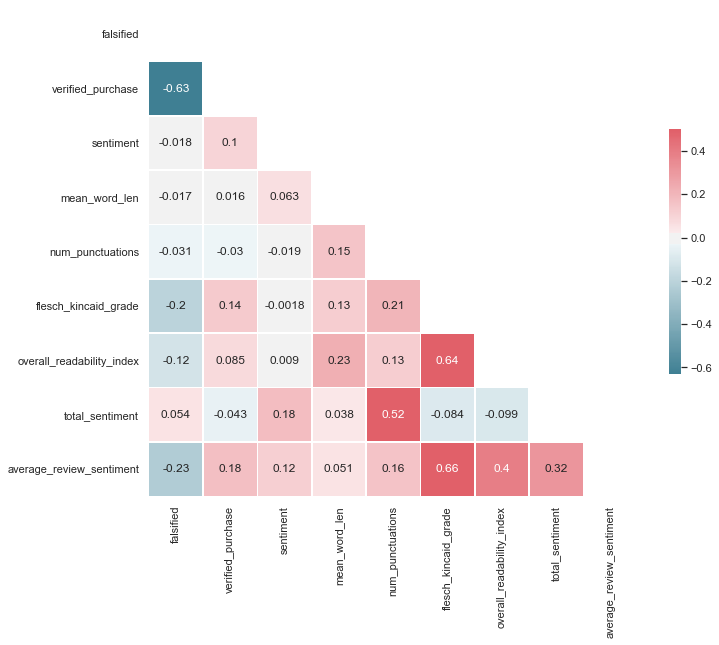

In [193]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df_corr = df_numerical
df_corr = low_vif_df_numerical

sns.set(style="white")

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=corr)

<B> Final EDA <b>
    
---    
    
Now that we have all of our features fully engineered, let's dig into the data and check for any last outliers.

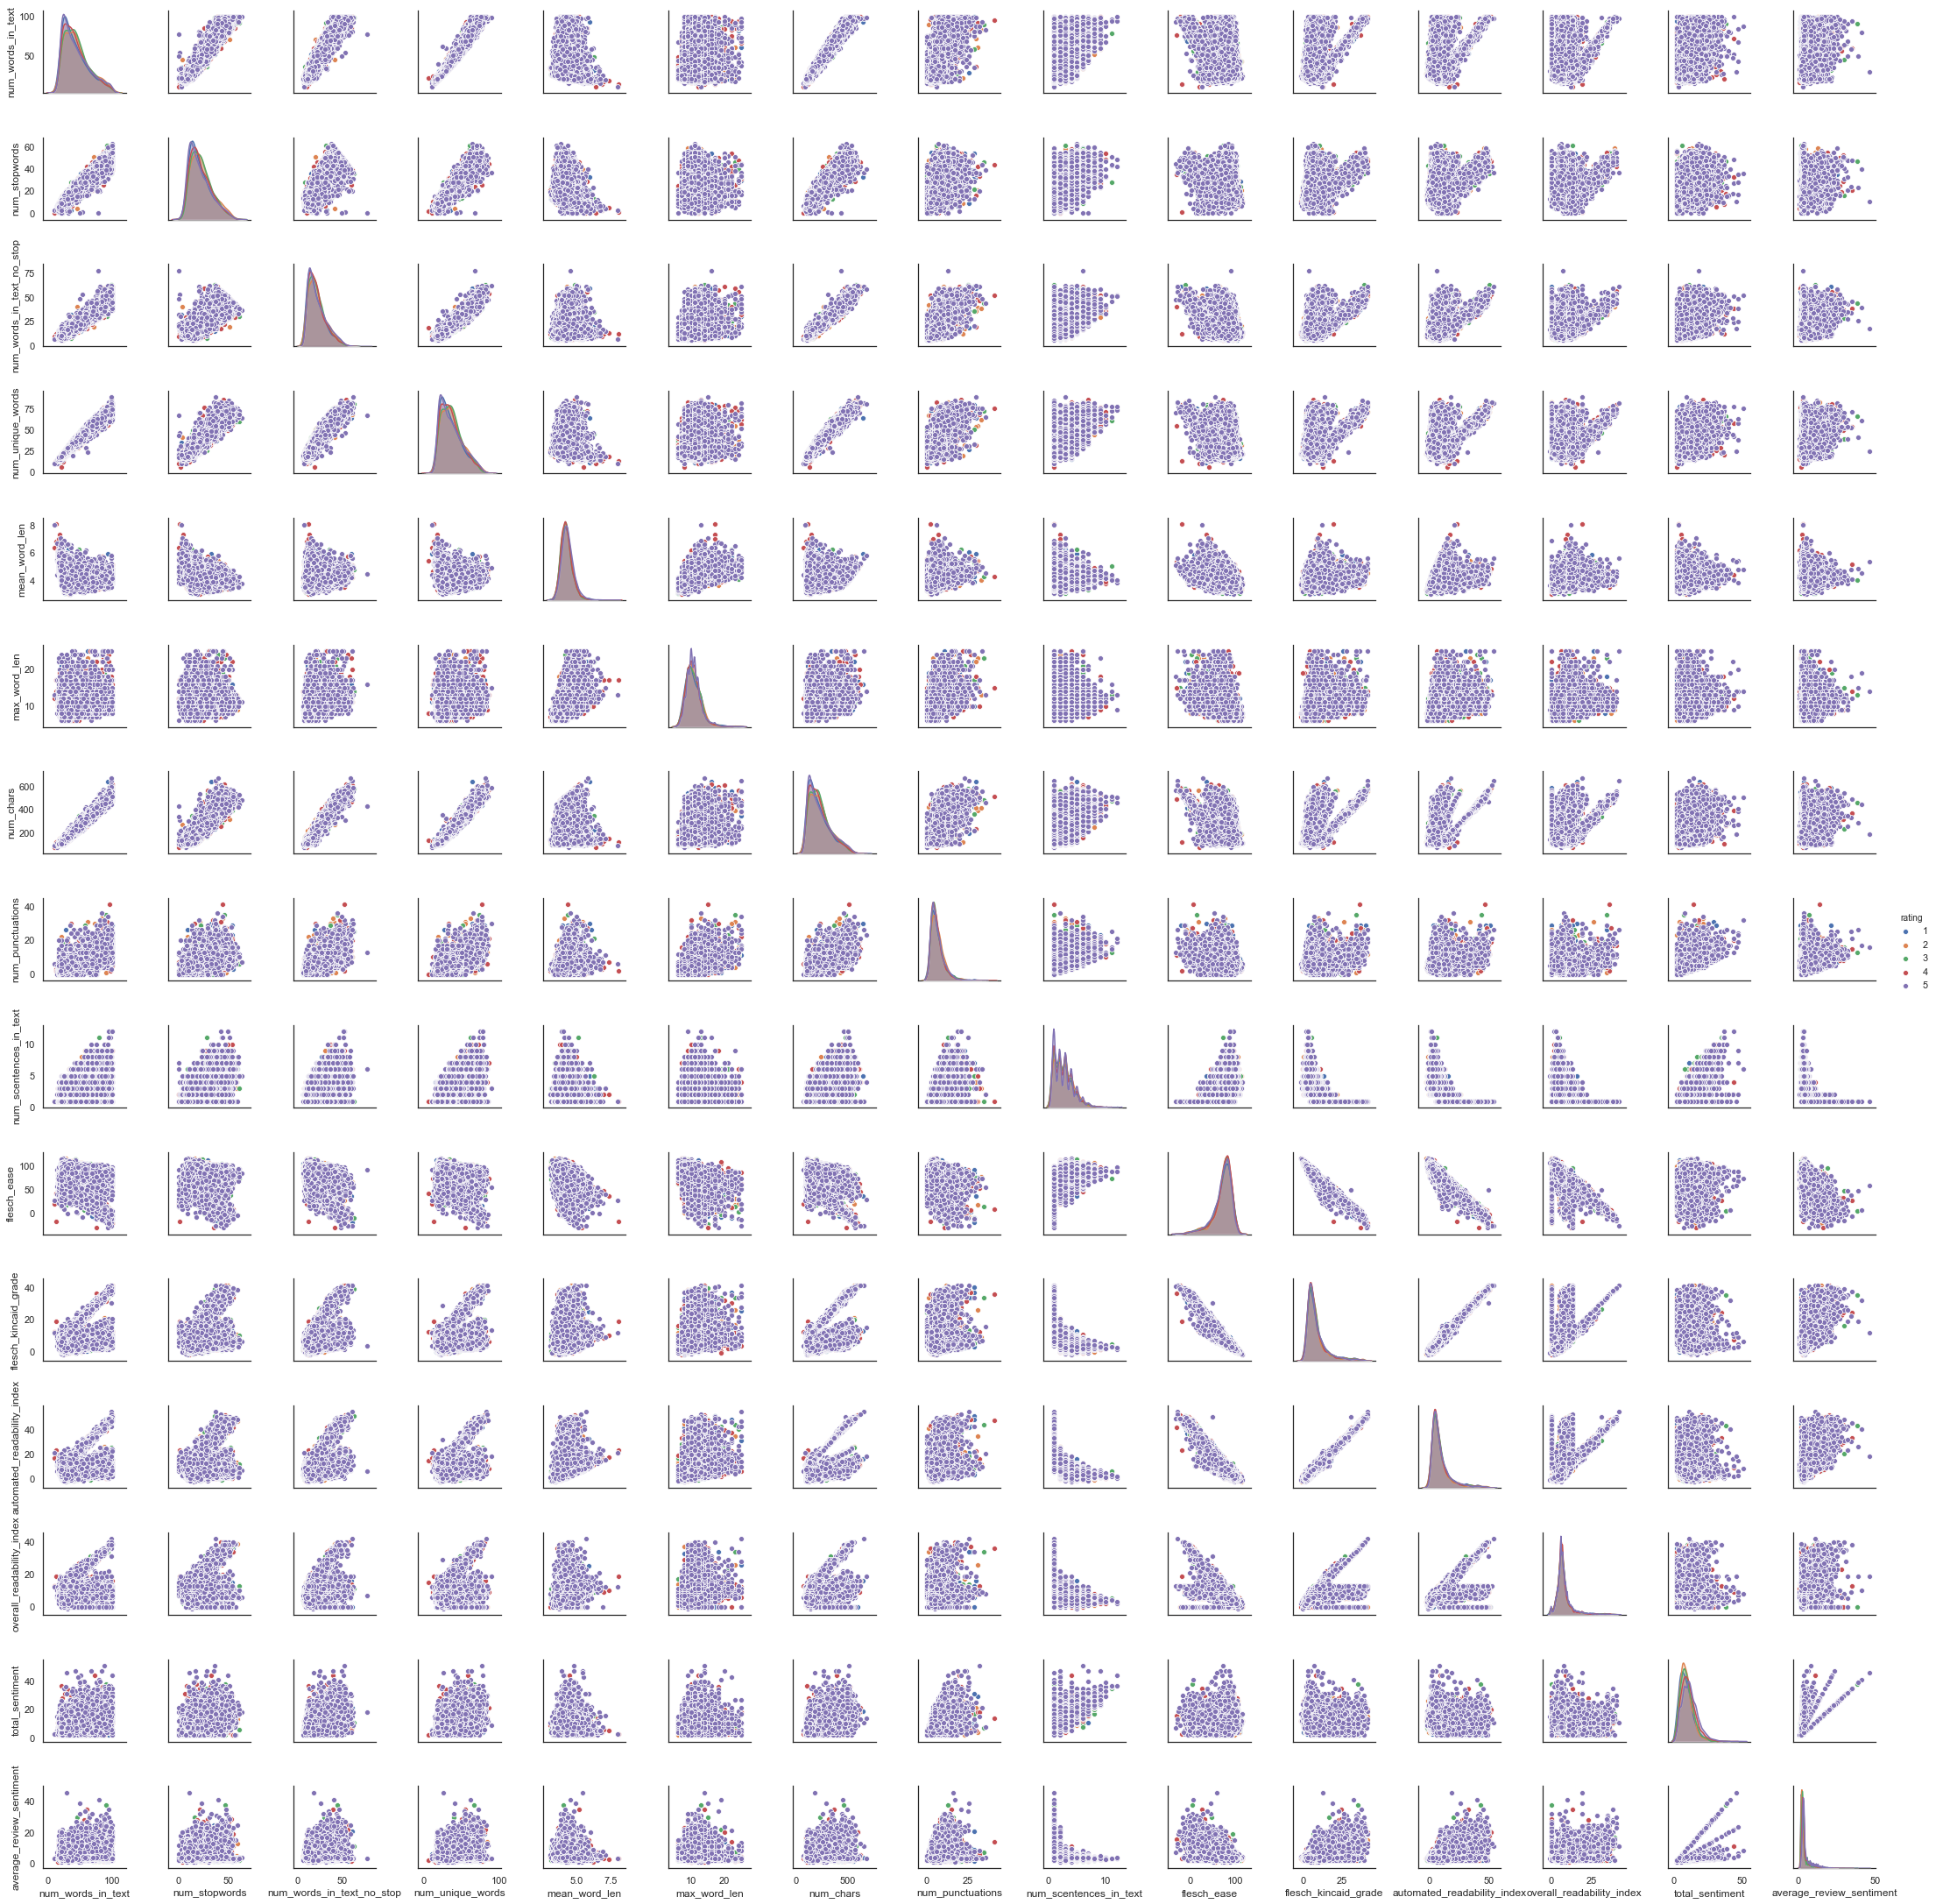

In [194]:
# Let's start by looking at the data using a pairs plot
df_for_pair_plot = df_numerical.drop(columns=['verified_purchase', 'falsified', 'sentiment'])
sns.pairplot(df_for_pair_plot, height=2, kind="scatter", hue='rating');

<b> Inspection of Interesting Graphs <b>

Let's just take a look at a couple of the interesting graphs. There seems to be a very discrete nature to the reveiews. Lines and patterns form.

In [92]:
from bokeh.plotting import figure, output_file, show

N = 4000
x=df_for_pair_plot["num_chars"]
y=df_for_pair_plot["automated_readability_index"]
radii = np.random.random(size=N) * 1
colors = ["#%02x%02x%02x" % (int(r), 
                             int(g), 
                             150) for r, 
                              g in zip(50+2*x, 30+2*y)]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(x, y, 
          fill_color=colors, 
          fill_alpha=0.6,
          line_color=None)

#output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

### 5. Preliminary Modeling

Just to get another baseline, lets see where we stand with our explained varience and other usefull information.

In [195]:
import statsmodels.api as sm

In [196]:
from sklearn.preprocessing import StandardScaler

y = low_vif_df_numerical['falsified']
X = low_vif_df_numerical.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(y.shape)
print(X.shape)

(17641,)
(17641, 8)


In [197]:
X_withconstant = sm.add_constant(X)

my_logit_results = sm.Logit(y, X_withconstant).fit()
my_logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.448582
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              falsified   No. Observations:                17641
Model:                          Logit   Df Residuals:                    17632
Method:                           MLE   Df Model:                            8
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                  0.3513
Time:                        13:50:50   Log-Likelihood:                -7913.4
converged:                       True   LL-Null:                       -12198.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         2.0210      0.204      9.931      0.000       1.622       2.420
verified_purchase            -3.1729      0.045    -69.972      0.000      -3.262      -3.084
sentiment                     0.3538      0.051      6.910      0.000       0.253       0.454
mean_word_len                 0.0373      0.047      0.791      0.429      -0.055       0.130
num_punctuations             -0.0886      0.007    -12.631      0.000      -0.102      -0.075
flesch_kincaid_grade          0.0157      0.006      2.702      0.007       0.004       0.027
overall_readability_index     0.0060      0.006      1.028      0.304      -0.005       0.017
total_sentiment               0.0802      0.005     14.646      0.000       0.069       0.091
average_review_sentiment     -0.1758      0.010    -18.178      0.000      -0.195      -0.157
=============================================================================================
"""

### 6. Class Imbalance + Downsampling DF

We need to address the class imbalance we found earlier.

We'll use Resample from SKlearn.

1    13636
0     4005
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment Counts')

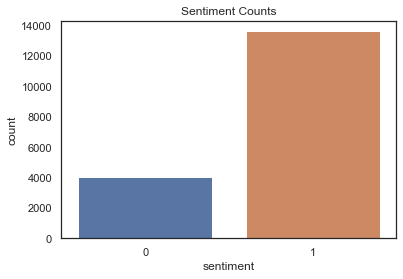

In [198]:
print(low_vif_df_numerical['sentiment'].value_counts())
sns.countplot(x='sentiment', data=low_vif_df_numerical)
plt.title("Sentiment Counts")

In [199]:
1-4817/16183

0.7023419637891615

In [200]:
from sklearn.utils import resample

positive = low_vif_df_numerical[low_vif_df_numerical['sentiment']==1]
negative = low_vif_df_numerical[low_vif_df_numerical['sentiment']==0]

positive_downsampled = resample(positive,
                                replace = False, # sample without replacement
                                n_samples = len(negative), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([positive_downsampled, negative])

df_downsampled = downsampled

1    4005
0    4005
Name: sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment Counts')

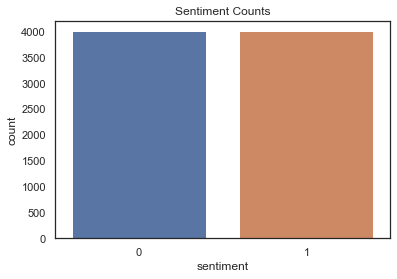

In [201]:
print(df_downsampled['sentiment'].value_counts())
sns.countplot(x='sentiment', data=df_downsampled)
plt.title("Sentiment Counts")

In [202]:
#As this is our fully formed dataset, let's save a backup copy.
df_downsampled.to_csv('data/df_downsampled.csv',index = False);

In [203]:
df_downsampled.shape

(8010, 9)

### 7. Clustering

Lets reduce our dataset to visually explore our dataset.

I'm hoping to see the falsified labels spread thoughout my clusters otherwise I will suspect this dataset is faulty.

In [2]:
df_downsampled = pd.read_csv('data/df_downsampled.csv');

In [71]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

<b> TSNE <b>
    
Lets use TSNE first and then try GMM.

In [287]:
# tSNE with two components
y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified', axis=1)

# y = df_final['falsified']
# X = df_final.drop(columns='falsified', axis=1)

# We need to scale the data since tSNE is also distance based
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

my_tSNE = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

X_tSNE = my_tSNE.fit_transform(X_scaled)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9104 samples in 0.006s...
[t-SNE] Computed neighbors for 9104 samples in 0.724s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9104
[t-SNE] Computed conditional probabilities for sample 2000 / 9104
[t-SNE] Computed conditional probabilities for sample 3000 / 9104
[t-SNE] Computed conditional probabilities for sample 4000 / 9104
[t-SNE] Computed conditional probabilities for sample 5000 / 9104
[t-SNE] Computed conditional probabilities for sample 6000 / 9104
[t-SNE] Computed conditional probabilities for sample 7000 / 9104
[t-SNE] Computed conditional probabilities for sample 8000 / 9104
[t-SNE] Computed conditional probabilities for sample 9000 / 9104
[t-SNE] Computed conditional probabilities for sample 9104 / 9104
[t-SNE] Mean sigma: 0.226968
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.496231
[t-SNE] KL divergence after 300 iterations: 2.232075


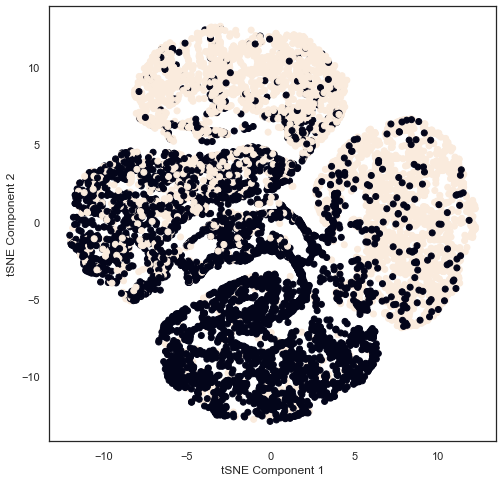

In [288]:
# Plotting the tSNE-transformed data (only the first two dimensions)
plt.figure(figsize=(8, 8))
plt.scatter(X_tSNE[:,0],X_tSNE[:,1],c=y)

plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")

plt.show()

<b> Next up: GMM! <b>

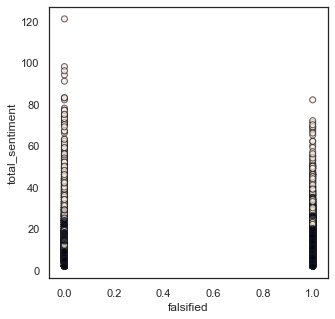

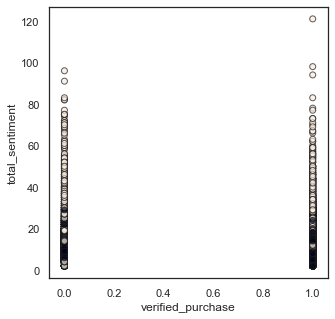

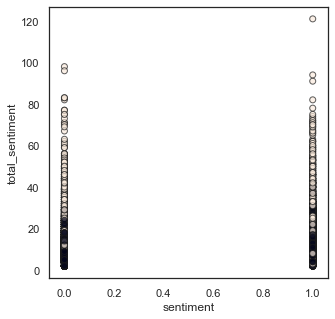

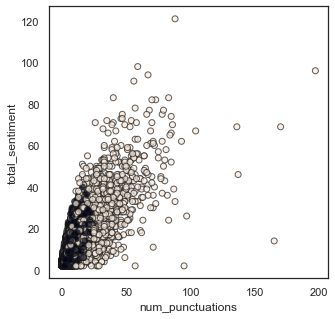

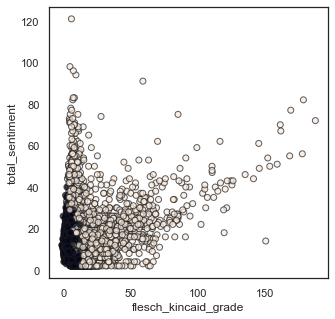

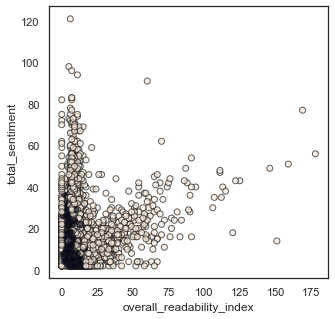

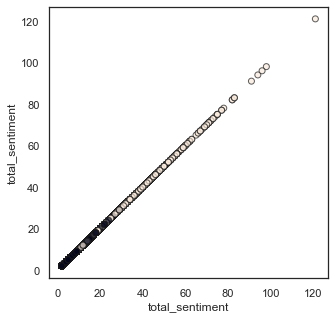

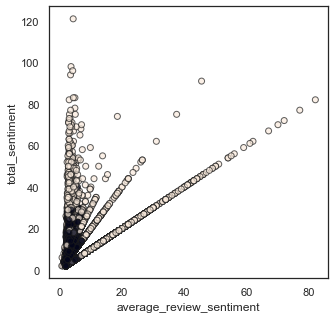

In [51]:
from sklearn.mixture import GaussianMixture

X = df_downsampled
y = df_downsampled['falsified']

#Build and fit the model
my_gmm = GaussianMixture(n_components=2, covariance_type='full')
my_gmm.fit(X)

#Getting the labels
pred_labels_gmm = my_gmm.predict(X)

for column in df_downsampled:
    #Plot the predictions
    plt.figure(figsize=[5,5])
    plt.scatter(x = df_downsampled[column],
                y = df_downsampled['total_sentiment'],
                c=pred_labels_gmm, 
                edgecolor='k',
                alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('total_sentiment')
    plt.show();

### 8. LogReg Odds Ratio + Feature Importance

In [380]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

<b> Feature Importance <b>

The first step will be to invesitgate to what extent each of the features contribute to increasing or decreasing the chance of a falsified review.

In [381]:
from sklearn.linear_model import LogisticRegression

df_numerical = df_numerical.drop(columns=['num_words_in_text','num_stopwords'])
y = df_numerical['falsified']
X = df_numerical.drop(columns='falsified')

# y = df_downsampled['falsified']
# X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(y.shape)
print(X.shape)

(20596,)
(20596, 16)


In [382]:
display_NA_counts(X)

Series([], dtype: int64)

In [383]:
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [384]:
my_logreg_model_scaled = LogisticRegression(C=1, random_state=1, max_iter=1000).fit(X_scaled_train, y_train)

In [385]:
print(my_logreg_model_scaled.score(X_scaled_test,y_test))

0.7844660194174757


In [386]:
X_withconstant = sm.add_constant(X)

my_logit_results = sm.Logit(y, X_withconstant).fit()
my_logit_results.summary()

Optimization terminated successfully.
         Current function value: 0.468457
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              falsified   No. Observations:                20596
Model:                          Logit   Df Residuals:                    20579
Method:                           MLE   Df Model:                           16
Date:                Sat, 27 Jun 2020   Pseudo R-squ.:                  0.3242
Time:                        10:43:38   Log-Likelihood:                -9648.3
converged:                       True   LL-Null:                       -14276.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           7.3805      1.548      4.767      0.000       4.346      10.415
rating                          0.1019      0.033      3.091      0.002       0.037       0.166
verified_purchase              -2.9158      0.040    -73.182      0.000      -2.994      -2.838
sentiment                       0.0383      0.100      0.382      0.703      -0.158       0.235
num_words_in_text_no_stop      -0.0263      0.006     -4.515      0.000      -0.038      -0.015
num_unique_words               -0.0004      0.004     -0.105      0.916      -0.008       0.008
mean_word_len                  -0.6312      0.159     -3.976      0.000      -0.942      -0.320
max_word_len                    0.0428      0.009      4.703      0.000       0.025       0.061
num_chars                       0.0010      0.001      1.585      0.113      -0.000       0.002
num_punctuations               -0.0619      0.005    -11.536      0.000      -0.072      -0.051
num_scentences_in_text          0.0007      0.025      0.027      0.978      -0.049       0.050
flesch_ease                    -0.0306      0.009     -3.416      0.001      -0.048      -0.013
flesch_kincaid_grade           -0.2039      0.069     -2.962      0.003      -0.339      -0.069
automated_readability_index     0.1121      0.037      3.070      0.002       0.041       0.184
overall_readability_index      -0.0005      0.004     -0.126      0.900      -0.008       0.007
total_sentiment                 0.0643      0.007      9.072      0.000       0.050       0.078
average_review_sentiment       -0.1567      0.011    -13.734      0.000      -0.179      -0.134
===============================================================================================
"""

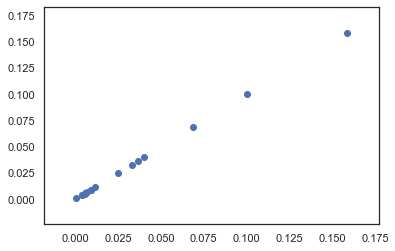

In [413]:
values = my_logit_results.bse[1:]
values.head()

plt.plot()
plt.scatter(values, values)
plt.show()

In [387]:
coefficients = my_logit_results.params
coefficients.head()

const                        7.38
rating                       0.10
verified_purchase           -2.92
sentiment                    0.04
num_words_in_text_no_stop   -0.03
dtype: float64

In [388]:
p_values = my_logit_results.pvalues
p_values.head()

const                       0.00
rating                      0.00
verified_purchase           0.00
sentiment                   0.70
num_words_in_text_no_stop   0.00
dtype: float64

In [389]:
coefficient_df = pd.DataFrame({"coefficient": coefficients,
                               "p-value": p_values})
print(coefficient_df.shape)
coefficient_df.head()

(17, 2)


coefficient  p-value
const                             7.38     0.00
rating                            0.10     0.00
verified_purchase                -2.92     0.00
sentiment                         0.04     0.70
num_words_in_text_no_stop        -0.03     0.00

In [390]:
coefficient_df.drop('const', axis=0, inplace=True)
coefficient_df.head()

coefficient  p-value
rating                            0.10     0.00
verified_purchase                -2.92     0.00
sentiment                         0.04     0.70
num_words_in_text_no_stop        -0.03     0.00
num_unique_words                 -0.00     0.92

In [391]:
statistically_significant_condition = coefficient_df['p-value'] < 0.05

significant_coefficient_df = coefficient_df.loc[statistically_significant_condition].copy()
significant_coefficient_df.shape

(11, 2)

In [392]:
significant_coefficient_df['abs_coef'] = np.abs(significant_coefficient_df['coefficient'])
significant_coefficient_df = significant_coefficient_df.sort_values(by='abs_coef')
significant_coefficient_df

coefficient  p-value  abs_coef
num_words_in_text_no_stop          -0.03     0.00      0.03
flesch_ease                        -0.03     0.00      0.03
max_word_len                        0.04     0.00      0.04
num_punctuations                   -0.06     0.00      0.06
total_sentiment                     0.06     0.00      0.06
rating                              0.10     0.00      0.10
automated_readability_index         0.11     0.00      0.11
average_review_sentiment           -0.16     0.00      0.16
flesch_kincaid_grade               -0.20     0.00      0.20
mean_word_len                      -0.63     0.00      0.63
verified_purchase                  -2.92     0.00      2.92

In [393]:
significant_coefficient_df['color'] = np.where(significant_coefficient_df['coefficient'] >= 0.0,
                                               'blue', 
                                               'red')
significant_coefficient_df.head()

coefficient  p-value  abs_coef color
num_words_in_text_no_stop        -0.03     0.00      0.03   red
flesch_ease                      -0.03     0.00      0.03   red
max_word_len                      0.04     0.00      0.04  blue
num_punctuations                 -0.06     0.00      0.06   red
total_sentiment                   0.06     0.00      0.06  blue

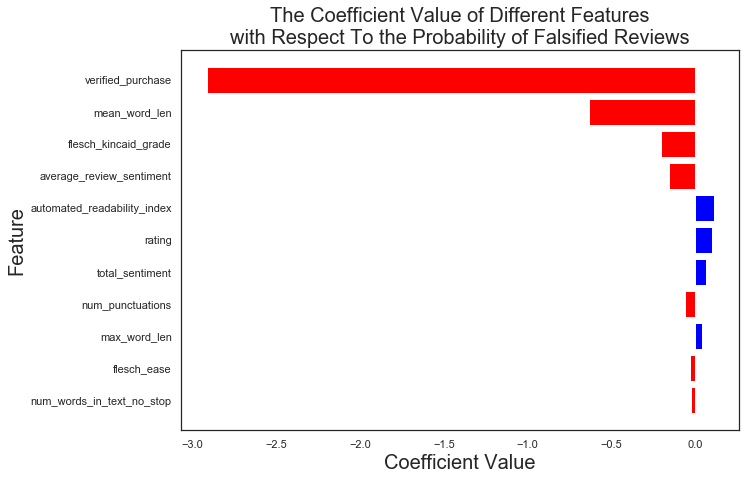

In [394]:
plt.figure(figsize=(10,7))
plt.barh(significant_coefficient_df.index, 
         significant_coefficient_df['coefficient'],
         color=significant_coefficient_df['color'])
plt.title("The Coefficient Value of Different Features\nwith Respect To the Probability of Falsified Reviews",
          size=20)
plt.xlabel("Coefficient Value", size=20)
plt.ylabel("Feature", size=20)
plt.show()

In [395]:
significant_coefficient_df['odds_increase'] = np.where(significant_coefficient_df['coefficient'] > 0,
                                                       np.exp(significant_coefficient_df['coefficient']),
                                                       np.exp(-significant_coefficient_df['coefficient']))
significant_coefficient_df.head() 

coefficient  p-value  abs_coef color  odds_increase
num_words_in_text_no_stop        -0.03     0.00      0.03   red           1.03
flesch_ease                      -0.03     0.00      0.03   red           1.03
max_word_len                      0.04     0.00      0.04  blue           1.04
num_punctuations                 -0.06     0.00      0.06   red           1.06
total_sentiment                   0.06     0.00      0.06  blue           1.07

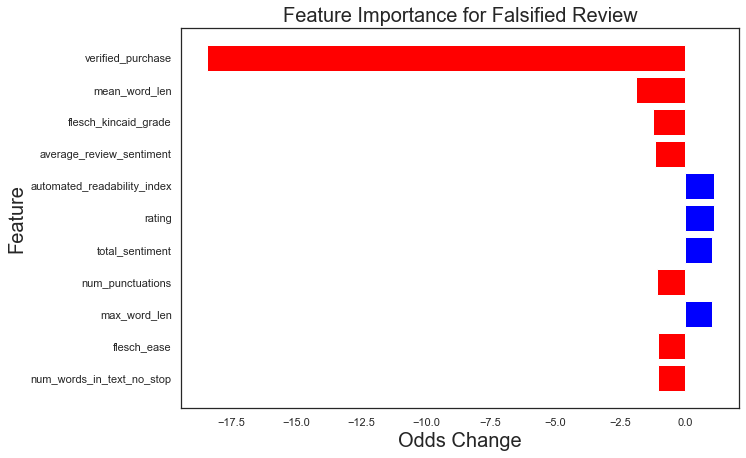

In [396]:
significant_coefficient_df['odds_increase'] = np.where(significant_coefficient_df['coefficient'] > 0,
                                                       significant_coefficient_df['odds_increase'],
                                                       -significant_coefficient_df['odds_increase'])


plt.figure(figsize=(10,7))
plt.barh(significant_coefficient_df.index, 
         significant_coefficient_df['odds_increase'],
         color=significant_coefficient_df['color'])
plt.title("Feature Importance for Falsified Review",
          size=20)
plt.xlabel("Odds Change", size=20)
plt.ylabel("Feature", size=20)
plt.show()

In [397]:
significant_coefficient_df['abs_coef'] = np.abs(significant_coefficient_df['coefficient'])
significant_coefficient_df['p-value'] = np.round(significant_coefficient_df['p-value'], 2)


significant_coefficient_df['odds_increase'] = np.where(significant_coefficient_df['coefficient'] > 0,
                                           np.exp(significant_coefficient_df['coefficient']),
                                           -np.exp(-significant_coefficient_df['coefficient']))

significant_coefficient_df['odds_increase'] = np.round(significant_coefficient_df['odds_increase'],2)


significant_coefficient_df = significant_coefficient_df.sort_values(by=['p-value','abs_coef'], ascending=[False, True])

labels = []
sizes = []
p_values = []
colors = []        # Holds bar colors

p_value_color_scale = 1.5

# iterate through
for index, row in significant_coefficient_df.iterrows():
    
        labels.append(index)
        
        coefficient_value = row['coefficient']
        p_value = row['p-value']
        
        p_values.append(p_value)
        
        size = row['odds_increase']
        sizes.append(size)

        # Red, Green, Blue
        color = [1.0,1.0,1.0]
        
        # Adjust the green value based on the p_value
        p_value_color = min(p_value_color_scale*p_value, 1.0) # values can't be larger than 1.0
        
        color[1] = p_value_color
        
        # Based on the p-value and the sign, we will adjust the color of the bar
        if (coefficient_value >= 0):
            color[0] = color[1]                     # Make RED brighter
        else:
            color[2] = color[1]                     # Make BLUE brighter

        colors.append(color)

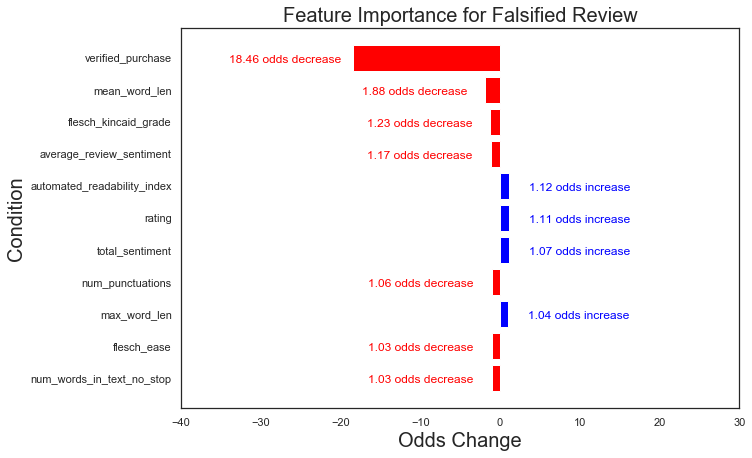

In [398]:
fix, ax = plt.subplots(figsize=(10,7))
ax.barh(labels, sizes, color=colors)

for index, bar_size in enumerate(sizes):
    
    if (bar_size > 0.0):
        # Add a label text
        ax.text(bar_size + 2.5, index-0.15, f'{bar_size} odds increase', color='blue')
        
#         # Add a p-value disclaimer
#         if (p_values[index] >= 0.05):
#             ax.text(-2.5, index-0.15, f'p-value={p_values[index]}', color='blue')
    else:
        # Label text
        ax.text(bar_size - 15.5, index-0.15, f'{abs(bar_size)} odds decrease', color='red')
        
#         # p-value disclaimer
#         if (p_values[index] >= 0.05):
#             ax.text(0.3, index-0.15, f'p-value={p_values[index]}', color='red')

# change the limit to make sure labels go inside the plot area
plt.xlim(-40, 30)

plt.title("Feature Importance for Falsified Review",
          size=20)
plt.xlabel("Odds Change", size=20)
plt.ylabel("Condition", size=20)
plt.show()

<b> Results <b>
    
Looks like the verified purchase is critical to our models ability to predict the "Non-Falsified" class.

### 9. Model Testing and Comparison

#### A. Logistic Regression

---

The order of operation will be:

1. Train-Test Split
2. Pre-process 
    1. Fit scaler on train data
    2. Transform train data
    3. Transform test data using the same scaler
3. Train model on scaled train data
4. Test model on scaled test data

In [455]:
#Set up X and y
X = df_downsampled.drop('falsified', axis=1)
y = df_downsampled['falsified']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_remainder, X_test, y_remainder, y_test = train_test_split(X, 
                                                            y, 
                                                            test_size = 0.2, 
                                                            stratify = y,
                                                            random_state=1)

In [456]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Set up X and y
X = df_downsampled.drop('falsified', axis=1)
y = df_downsampled['falsified']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

#Baseline LogReg Model
logreg_model = LogisticRegression( max_iter=10000).fit(X_scaled_train, y_train)

#Score it
print(logreg_model.score(X_scaled_train,y_train))
print(logreg_model.score(X_scaled_test,y_test))

0.8356221389929255
0.8274032459425718


In [457]:
from sklearn.metrics import classification_report

# predict on test set
logreg_pred = logreg_model.predict(X_scaled_test)

report_initial = classification_report(y_test, logreg_pred, digits=4)
print(report_initial)

              precision    recall  f1-score   support

           0     0.7658    0.8961    0.8258      1463
           1     0.8981    0.7697    0.8290      1741

    accuracy                         0.8274      3204
   macro avg     0.8319    0.8329    0.8274      3204
weighted avg     0.8377    0.8274    0.8275      3204



<b> Hyperparameters <b>
- Now that we have a baseline, let's see if we can optimize the hyperparameter C using cross validation. Let's also use a graph for visual inspection.

In [458]:
#Set up X and y
X = df_downsampled.drop('falsified', axis=1)
y = df_downsampled['falsified']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Store the results
validation_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    logreg_model = LogisticRegression(C = c,random_state=1, max_iter=10000)
    logreg_model.fit(X_scaled_train, y_train)
    
    # train on traning set
    train_scores.append(logreg_model.score(X_scaled_train, y_train))
    # score on validation set
    validation_scores.append(logreg_model.score(X_scaled_test, y_test))
    

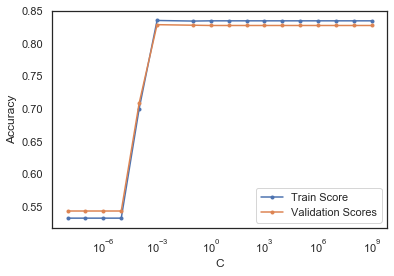

In [459]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

In [460]:
# Getting our optimal max depth value
C_range[np.argmax(validation_scores)]

0.001

In [462]:
my_final_model = LogisticRegression(C=.001,random_state=1,max_iter=1000)

# Remember that X_remainder and y_remainder held the data I split into train and validation
# I can use that data to re-train my model
my_final_model.fit(X_scaled_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### LOG REG RESULTS

In [463]:
print(my_final_model.score(X_scaled_train,y_train))
print(my_final_model.score(X_scaled_test,y_test))

0.8353843410023185
0.8289637952559301


In [464]:
from sklearn.metrics import classification_report

# predict on test set
logreg_pred = my_final_model.predict(X_scaled_test)

report_initial = classification_report(y_test, logreg_pred, digits=4)
print(report_initial)

              precision    recall  f1-score   support

           0     0.7688    0.8943    0.8268      1097
           1     0.8971    0.7741    0.8311      1306

    accuracy                         0.8290      2403
   macro avg     0.8329    0.8342    0.8289      2403
weighted avg     0.8385    0.8290    0.8291      2403



In [465]:
from sklearn.metrics import confusion_matrix

confusion_matrix_logreg = confusion_matrix(y_test, logreg_pred)

pd.DataFrame(data=confusion_matrix_logreg,
            index = ["Predicted non-Falsified", "Predicted Falsified"],
            columns = ["True Non-Falsified", "True Falsified"])

True Non-Falsified  True Falsified
Predicted non-Falsified                 981             116
Predicted Falsified                     295            1011

#### B. K-Nearest Neighbors

In [200]:
from sklearn.neighbors import KNeighborsClassifier

# y = df_numerical['falsified']
# X = df_numerical.drop(columns='falsified')

y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Instantiate the model & fit it to our data
KNN_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
KNN_model.fit(X_train, y_train)

# Score the model on the test set
train_predictions = KNN_model.predict(X_train)
test_predictions = KNN_model.predict(X_test)

train_accuracy = accuracy_score(train_predictions, y_train)
test_accuracy = accuracy_score(test_predictions, y_test)

print(f"Train set accuracy: {train_accuracy}")
print(f"Test set accuracy: {test_accuracy}")

Train set accuracy: 0.9953710616694043
Test set accuracy: 0.697910447761194


In [201]:
# Define hyperparameters to search over
dt_params = { 'n_neighbors':list(range(1,15)), 
              'leaf_size': list(range(1,15))
            }

In [202]:
from sklearn.model_selection import GridSearchCV

# Initiate the DT grid search
gs_knnmodel = GridSearchCV(estimator=KNeighborsClassifier(), \
                          param_grid=dt_params, cv=5, n_jobs=-1, verbose=0)

# Fit the DT grid search
gs_knnmodel_fitted = gs_knnmodel.fit(X_test, y_test)

In [203]:
# Show the best estimators
gs_knnmodel_fitted.best_params_

{'leaf_size': 1, 'n_neighbors': 14}

##### KNN RESULTS

In [204]:
# Let's see if our accuracy improved
print(gs_knnmodel_fitted.score(X_train, y_train))
print(gs_knnmodel_fitted.score(X_test, y_test))

0.6683589667015082
0.7229850746268657


In [205]:
# predict on test set
knn_pred = gs_knnmodel_fitted.predict(X_test)

In [206]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, knn_pred, digits=4)
print(report_initial)

              precision    recall  f1-score   support

           0     0.7051    0.7015    0.7033       784
           1     0.7385    0.7419    0.7402       891

    accuracy                         0.7230      1675
   macro avg     0.7218    0.7217    0.7218      1675
weighted avg     0.7229    0.7230    0.7229      1675



#### E. Support Vector Machines

In [72]:
from sklearn.svm import LinearSVC

In [49]:
y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

SVM_model = LinearSVC(max_iter=10000)
SVM_model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

##### SVM RESULTS

In [50]:
print(f"The TRAIN classification accuracy is: {SVM_model.score(X_train,y_train)}")
print(f"The TEST classification accuracy is: {SVM_model.score(X_test,y_test)}")

The TRAIN classification accuracy is: 0.8177966101694916
The TEST classification accuracy is: 0.8191800878477306


In [51]:
# predict on test set
svn_pred = SVM_model.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, svn_pred, digits=4)
print(report_initial)

              precision    recall  f1-score   support

           0     0.7841    0.8678    0.8238      1331
           1     0.8602    0.7730    0.8143      1401

    accuracy                         0.8192      2732
   macro avg     0.8222    0.8204    0.8191      2732
weighted avg     0.8231    0.8192    0.8189      2732



/// CAUTION /// 

The code below takes a long time to run!

In [ ]:
from sklearn.svm import SVC

y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Instantiate the model
my_RBF_kernel_SVM = SVC()
my_linear_kernel_SVM = SVC(kernel='linear', C=1000)

#Fit the data
my_linear_kernel_SVM.fit(X_train, y_train)

#Get the score
print(f"Linear SVM score (train): {my_linear_kernel_SVM.score(X_train,y_train)}")
print(f"Linear SVM score (test): {my_linear_kernel_SVM.score(X_test,y_test)}")

In [59]:
# Define hyperparameters to search over
kernel_SVM_params = { 'C':list([.0001,.001,0.1,1,10,100,1000,10000,100000,]), 
                     # 'kernel': list(['linear', 'poly', 'rbf', 'sigmoid'])
                    }

/// Caution! ///

The code below takes an exceptionally long time to run.

In [ ]:
# # Initiate the DT grid search
# ksvm = GridSearchCV(estimator=SVC(random_state = 1), \
#                           param_grid=kernel_SVM_params, cv=5, n_jobs=-1, verbose=0)

# # Fit the DT grid search
# ksvm_model_fitted = ksvm.fit(X_test, y_test)

In [ ]:
# Show the best estimators
ksvm_model_fitted.best_params_

In [ ]:
# predict on test set
ksvm_model_fitted = my_linear_kernel_SVM.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, ksvm_model_fitted, digits=4)
print(report_initial)

#### C. Decision Tree

In [207]:
from sklearn.tree import DecisionTreeClassifier

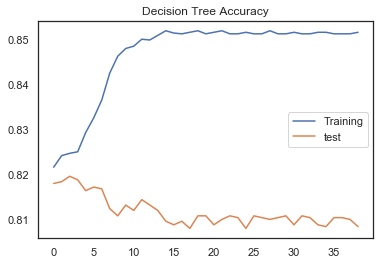

In [208]:
training_scores = []
test_scores = []

y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

for i in range(1,40):
    # Instantiate & fit the DT
    DT_model = DecisionTreeClassifier(max_depth=i, max_leaf_nodes=100)
    DT_model.fit(X_train, y_train)
    
    training_scores.append(DT_model.score(X_train, y_train))
    test_scores.append(DT_model.score(X_test, y_test))

plt.figure()
plt.title('Decision Tree Accuracy')
plt.plot(training_scores)
plt.plot(test_scores)
plt.legend(['Training', 'test'])

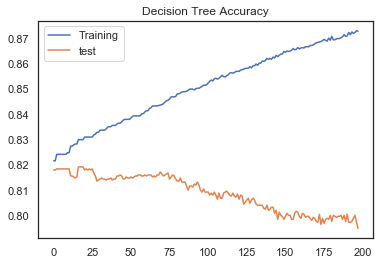

In [209]:
training_scores = []
test_scores = []

for i in range(2,200):
    # Instantiate & fit the DT
    DT_model = DecisionTreeClassifier(max_depth=19, max_leaf_nodes=i)
    DT_model.fit(X_train, y_train)
    
    training_scores.append(DT_model.score(X_train, y_train))
    test_scores.append(DT_model.score(X_test, y_test))

plt.figure()
plt.title('Decision Tree Accuracy')
plt.plot(training_scores)
plt.plot(test_scores)
plt.legend(['Training', 'test'])

In [210]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes=14)
DT_model.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=14,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### DT RESULTS

In [211]:
# Evaluate its classification accuracy (Just on the training set for now)
print(f"DT training set accuracy: {DT_model.score(X_train, y_train)}")
print(f"DT test set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 0.8250853242320819
DT test set accuracy: 0.8196656050955414


- Now that we have an optimized Decision Tree, let's see a grid search can conclude our results.

In [212]:
# Define hyperparameters to search over
dt_params = { 'max_depth':list(range(1,11)), 
              'min_samples_leaf': list(range(1,11)),
              'max_leaf_nodes': list(range(1,20))}

In [69]:
# Initiate the DT grid search
gs_dtmodel = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 1), \
                          param_grid=dt_params, cv=5, n_jobs=-1, verbose=0)

# Fit the DT grid search
gs_dtmodel_fitted = gs_dtmodel.fit(X_test, y_test)

In [70]:
# Show the best estimators
gs_dtmodel_fitted.best_params_

{'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_leaf': 1}

In [71]:
# Let's see if our accuracy improved
print(gs_dtmodel_fitted.score(X_test, y_test))
print(gs_dtmodel_fitted.score(X_train, y_train))

0.8224743777452416
0.8181104833647207


In [72]:
# Instantiate & fit the DT
DT_model = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes=16, min_samples_leaf=1)
DT_model.fit(X_train, y_train) 

# Evaluate its classification accuracy (Just on the training set for now)
print(f"The DT TRAINING set accuracy: {DT_model.score(X_train, y_train)}")
print(f"The DT TEST set accuracy: {DT_model.score(X_test, y_test)}")

DT training set accuracy: 0.8223477715003139
DT test set accuracy: 0.8195461200585652


In [73]:
from sklearn.metrics import classification_report

# predict on test set
dt_pred = DT_model.predict(X_test)

report_initial = classification_report(y_test, dt_pred, digits=4)
print(report_initial)

              precision    recall  f1-score   support

           0     0.7808    0.8753    0.8254      1331
           1     0.8661    0.7666    0.8133      1401

    accuracy                         0.8195      2732
   macro avg     0.8235    0.8209    0.8193      2732
weighted avg     0.8246    0.8195    0.8192      2732



#### D. Random Forest Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [226]:
df_downsampled.head(1)

falsified  verified_purchase  sentiment  mean_word_len  \
1719          1                  1          1           4.85   

      num_punctuations  flesch_kincaid_grade  overall_readability_index  \
1719                11                 17.70                      18.00   

      total_sentiment  average_review_sentiment  
1719             4.00                      4.00

In [227]:
y = df_downsampled['falsified']
X = df_downsampled.drop(columns='falsified')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_test_unscaled = X_test

#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

# Let's check our accuracy
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9857321205635813
0.8060757386600084


- Lets see if we can optimize a few hyper parameters

In [228]:
# Define hyperparameters to search over
rfc_params = { 'n_estimators':list(range(1,11)), 
               'min_samples_split': list(range(1,11)),
               'min_samples_leaf':list(range(1,11)),
               'max_leaf_nodes':list(range(1,11)) }

In [229]:
# Initiate the DT grid search
rfc2 = GridSearchCV(estimator=RandomForestClassifier(random_state = 1), \
                          param_grid=rfc_params, cv=5, n_jobs=-1, verbose=0)

# Fit the DT grid search
gs_rfcmodel_fitted = rfc2.fit(X_train, y_train)

In [230]:
# Show the best estimators
gs_rfcmodel_fitted.best_params_

{'max_leaf_nodes': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 8}

##### RFC RESULTS

In [231]:
# Let's see if our accuracy improved
print(gs_rfcmodel_fitted.score(X_train, y_train))
print(gs_rfcmodel_fitted.score(X_test, y_test))

0.8339575530586767
0.8256346233874324


In [232]:
# predict on test set
rfc_pred = rfc2.predict(X_test)

In [233]:
from sklearn.metrics import classification_report

# predict on test set
rfc_pred = rfc2.predict(X_test)

report_initial = classification_report(y_test, rfc_pred, digits=4)
print(report_initial)

              precision    recall  f1-score   support

           0     0.7653    0.8915    0.8236      1097
           1     0.8942    0.7703    0.8276      1306

    accuracy                         0.8256      2403
   macro avg     0.8297    0.8309    0.8256      2403
weighted avg     0.8353    0.8256    0.8258      2403



In [234]:
from sklearn.metrics import confusion_matrix

# predict on test set
rfc_pred = rfc2.predict(X_test)

confusion_matrix = confusion_matrix(y_test, rfc_pred)

In [235]:
pd.DataFrame(data=confusion_matrix,
            index = ["Predicted non-Falsified", "Predicted Falsified"],
            columns = ["True Non-Falsified", "True Falsified"])

True Non-Falsified  True Falsified
Predicted non-Falsified                 978             119
Predicted Falsified                     300            1006

##### MODEL EXAMINATION

<b> Where did we go wrong?<b>
    
Let's dive into decision trees to determine where our model got it wrong.

In [236]:
# Let's explore a few of the full length reviews to understand their content.
pd.set_option('display.max_colwidth', None)
# Looks good! Let's reset the setting
# pd.set_option('display.max_colwidth', 70)

In [237]:
# Let's pull out our X_test and the predictions and the actuals
df_predictions = pd.DataFrame(X_test_unscaled)
df_predictions["actual"] = y_test
df_predictions["predicted"] = rfc_pred

# Now we have a df containing only the incorrect values
df_incorrect = df_predictions[df_predictions["actual"] != df_predictions["predicted"]]

In [238]:
df_incorrect.shape

(419, 10)

In [239]:
df_incorrect.head(5)

verified_purchase  sentiment  mean_word_len  num_punctuations  \
18604                  0          0           4.34                 3   
14054                  0          0           3.95                 5   
2130                   1          0           3.55                 0   
17983                  0          0           4.89                 8   
590                    1          0           3.79                 5   

       flesch_kincaid_grade  overall_readability_index  total_sentiment  \
18604                 12.20                       8.00             6.00   
14054                  7.00                       7.00            10.00   
2130                  14.60                      15.00             2.00   
17983                  3.40                       6.00             6.00   
590                    4.20                       4.00             7.00   

       average_review_sentiment  actual  predicted  
18604                      6.00       0          1  
14054                      5.00       0          1  
2130                       2.00       1          0  
17983                      2.00       0          1  
590                        3.50       1          0

In [240]:
df_final.shape

(17641, 25)

In [241]:
df_final.head(1)

doc_id  falsified  rating  verified_purchase product_category  product_id  \
0       1          1       4                  0               PC  B00008NG7N   

                                 product_title review_title  \
0  Targus PAUK10U Ultra Mini USB Keypad, Black       useful   

                                                                                                          review_text_x  \
0  When least you think so, this product will save the day. Just keep it around just in case you need it for something.   

   sentiment  ...  max_word_len  num_chars  num_punctuations  \
0          1  ...            10        116                 3   

   num_scentences_in_text  flesch_ease  flesch_kincaid_grade  \
0                       2       102.10                  1.90   

   automated_readability_index  overall_readability_index  total_sentiment  \
0                         3.60                       5.00             6.00   

   average_review_sentiment  
0                      3.00  

[1 rows x 25 columns]

In [242]:
import itertools

# Let's initialize the first row with the first row of df_incorrect
df_final_incorrect = df_final.query("mean_word_len == 4.00 and num_punctuations == 8 and flesch_kincaid_grade == 4.30")

In [252]:
# Using values from mean_word_len, num_punctuations and flesch_kincaid_grade from df_incorrect at each row we can use them to filter through df_final
for i, j in itertools.product(range(1), range(20)):
    i = i + 2
    x = df_incorrect.iloc[j,i]
#     print(x)
    i = i + 1
    y = df_incorrect.iloc[j,i]
#     print(y)
    i = i + 1
    z = df_incorrect.iloc[j,i]
#     print(z)
    j = j + 1
    
    # Filter though df_final to select the correct row from df_final
    df_filtered = df_final.query("mean_word_len == @x and num_punctuations == @y and flesch_kincaid_grade == @z")
    
    # Append the selected row to df_final_incorrect
    incorrect_collection = df_final_incorrect.append(df_filtered, ignore_index=True)

In [283]:
a = 0

while(a <= 20):
    
    print(incorrect_collection.iloc[a,8])
    print()
    a += 1

I've spent way too much time trying to get this to work and it just wont. I have a new dell computer with windows 8 and it just isn;t recognizing the printer. I've tried it all and posted on forums to try and get some help but nothing has worked. I rarely return things, but this is going back.

Please do not waste your money.  The product did not function properly and would not knit.  I have a broken hearted daughter and a return line in my future.

These lights look great and I like that you can take the front off if you want. However, the mounting brackets are not very big.  I have a road bike with regular handle bars and it does not fit, nor the seat post.

i got  the  flour sack dish towels  iam  sending  them  back cos it  was ment  to be  free  and i had to  pay20  dollors  for them  im very sorry

The chain wouldn't fit around a child's neck and the ball was utterly cheap looking. WOULD NOT RECOMMEND. Don't understand how this has anywhere close to 5 stars...

We put the battery

<b>Interesting!<b> 

There might be some issues with symbols and other items messing up our predictions. But other than that, it looks pretty clean. Something to investigate further in the future.

### 10. Model Compairsion + Next Steps

All said and done, it seems that a simple Logistic Regression returned the most accurate results.

Model| Accuracy | Precision | Recall | F1-score | 
------------- | ------------- | ------------- | ------------- | ------------- |
<mark><b>Logistic Regression<b><mark>| 82.21% | 82.58%  |    82.53%   |   82.19% |
KNN | 76.13%   |   76.58%   |   76.29% | 76.09%|
SVM | 81.92%   |   82.31%    |  81.92% | 81.89% |
Random Forest Classifier | 81.59%    |  82.60%  |    81.95% | 81.90%


The next steps for this project will be to add addittional features such as Toxicity score and user behavior. Scraping public user data would be an exceptional boost to accuracy.